In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter
from scipy.stats import binomtest
import os

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
chimp_var = pd.read_csv("Chimp_Var.txt.gz", sep = "\t", header = None)
chimp_var = chimp_var[chimp_var[6] == 1]

chimp_var["Position"] = chimp_var[0] + ":" + chimp_var[1].astype(str)

chimp_var2 = pd.read_csv("Chimp_Var.txt.gz", sep = "\t", header = None)
chimp_var2["Position"] = chimp_var2[0] + ":" + chimp_var2[1].astype(str)

vs_c = vs[vs["Position"].isin(chimp_var2["Position"])]
vvs_c = vvs[vvs["Position"].isin(chimp_var2["Position"])]

vvv = prepare_alpha(vs_c, vvs, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.2, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

In [ ]:
#Change 0.1 to 0.25 for NFIB and other TFs with large effects on CA
v2_fore = vs[vs["abs logfc"] > 0.1]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("AllSpecSupLEQ19_AbsG0.1_Fixed_LSP_FilterNewTEs_Top20th.bed", sep = "\t", header = None, index = None)

vs["Chrom"] = [x.split(":")[0] for x in vs["Position"]]
vs["Pos1"] = [int(x.split(":")[1]) for x in vs["Position"]]
vs["Pos2"] = [int(x.split(":")[1]) + 1 for x in vs["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, vs[vs["abs logfc"] < 0.025]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("AllSpecSupLEQ19_AbsL0.025_G0.1_Fixed_Background_New_LSP_FilterNewTEs_Top20th.bed", sep = "\t", header = None, index = None)


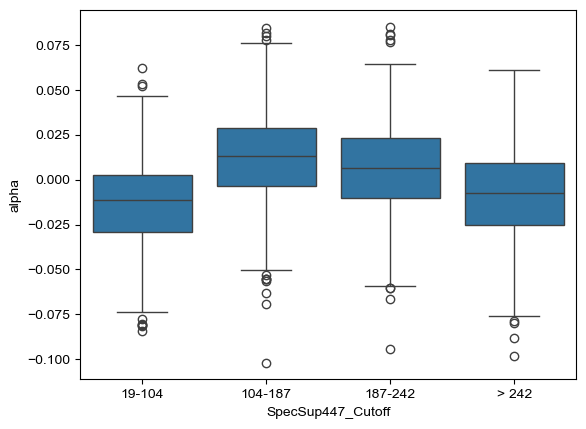

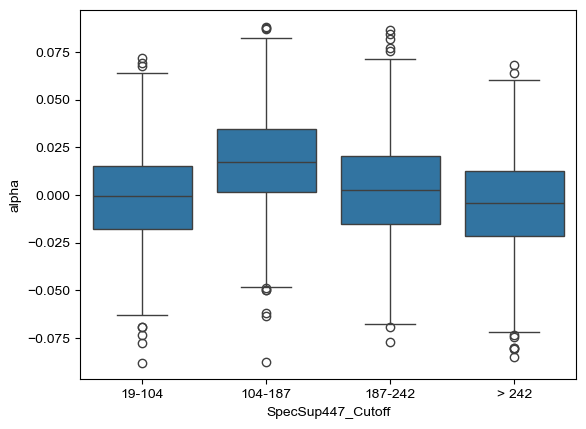

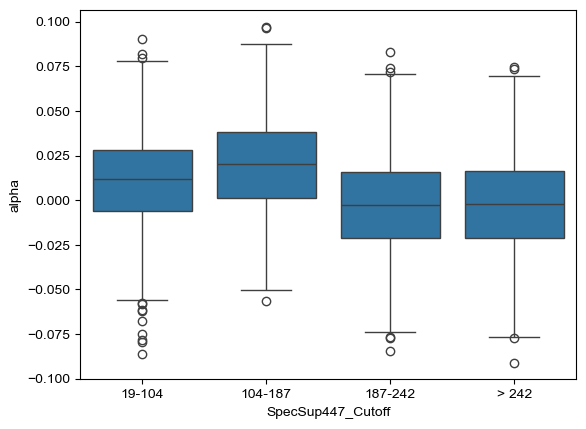

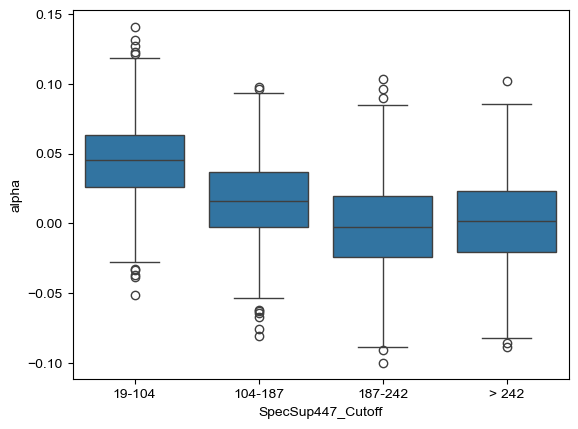

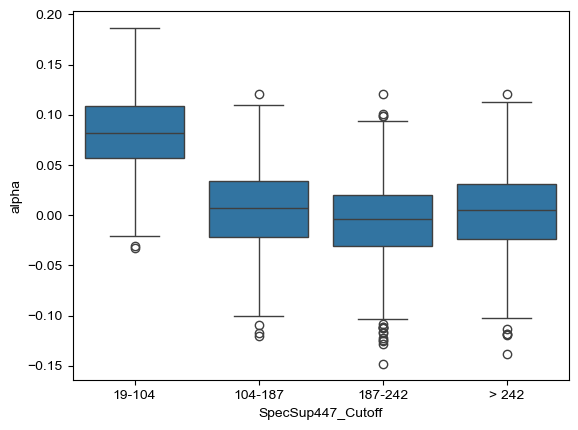

In [7]:
v = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_FilterNewTEs_RemRepeatsRemPseudos_FetalChondrocytes.txt.gz", sep = "\t")

for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9]:
    v2 = v[v["Proportion"] == cutoff]
    v2 = v2[v2["Top_20th"] == "Top20th"]
    sns.boxplot(data = v2, y = "alpha", x = "SpecSup447_Cutoff")
    plt.show()

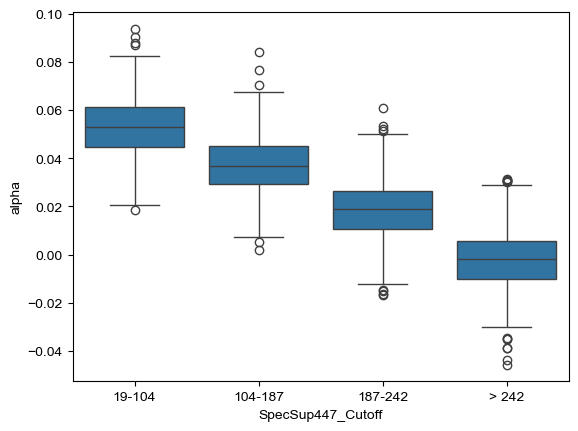

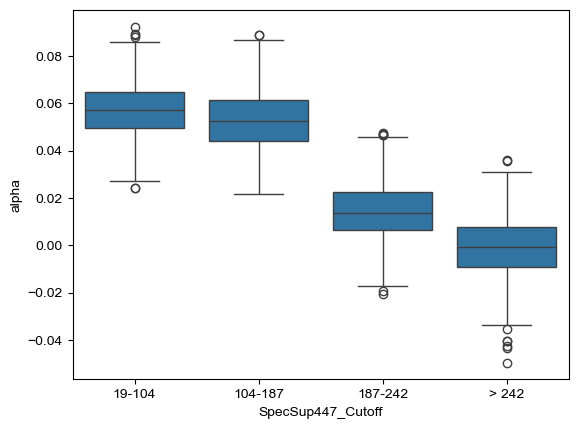

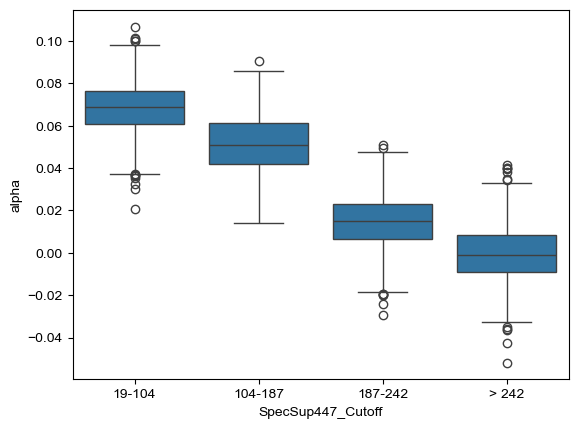

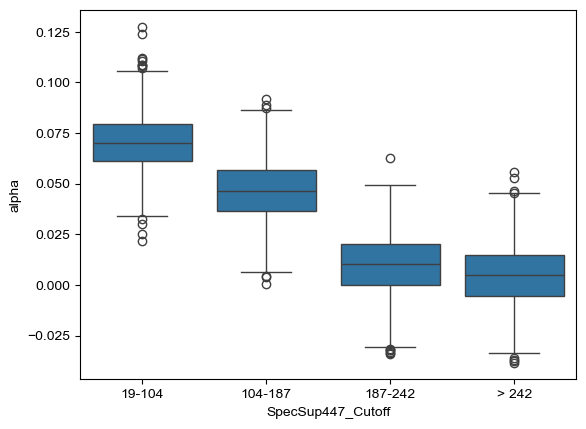

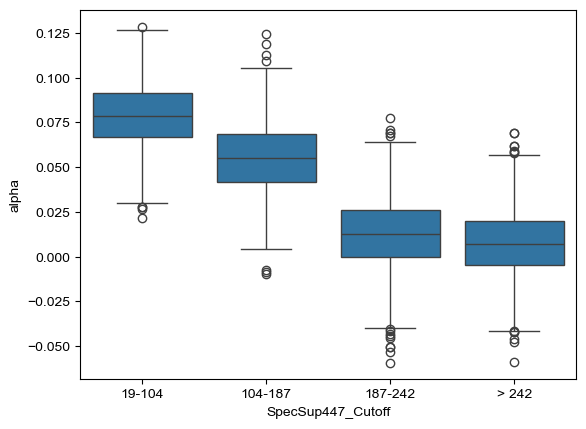

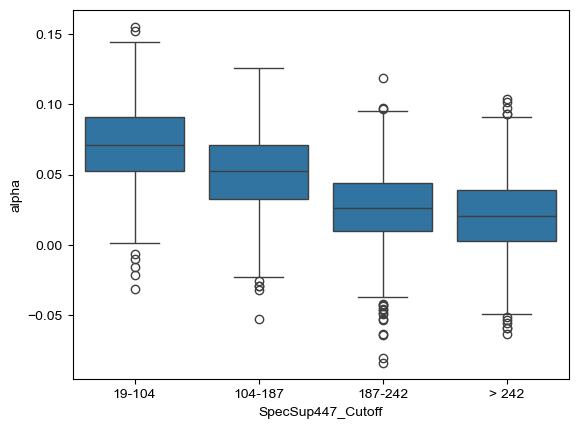

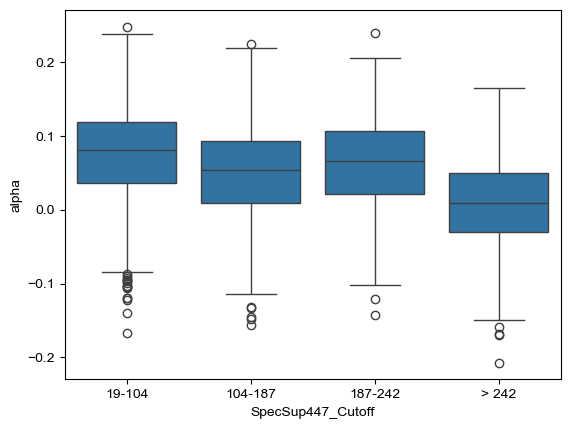

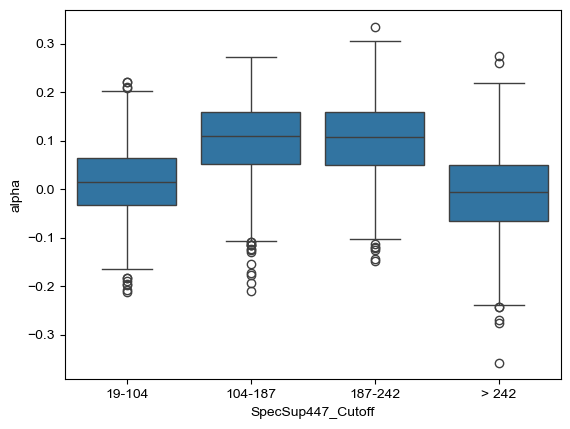

In [11]:
v = pd.read_csv("StratifySpecSup_Results/StratifiedBySpecSup_FilterNewTEs_FetalChondrocytes.NoL19.txt.gz", sep = "\t")

for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 0.995]:
    v2 = v[v["Proportion"] == cutoff]
    v2 = v2[v2["Top_20th"] == "Top20th"]
    sns.boxplot(data = v2, y = "alpha", x = "SpecSup447_Cutoff")
    plt.show()

In [3]:
df = pd.DataFrame()

cutoff = 0.9
for file in os.listdir("StratifySpecSup_Results"):
    if "FilterNewTEs" in file and "Rem" not in file and "NoL19" not in file and "OnlyRepeatsPseudos" not in file and "WL19" in file and "BalRep" in file:
        print(file)
        vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")

        v2r = vr[vr["Proportion"] == cutoff]
        v2r = v2r[v2r["Top_20th"] == "All"]
        v2r = v2r[v2r["SpecSup447_Cutoff"].isin(["<= 19", "> 242"])]
        v2r["Cell type"] = np.repeat(d_abrev[file.replace("AllBalRep_", "").replace("WL19_", "").replace("OnlyRepeatsPseudos_", "").replace("RemRepeatsRemPseudos_", "").replace("StratifiedBySpecSup_", "").replace(".txt.gz", "").replace(".NoL19", "").replace("FilterNewTEs_", "")], v2r.shape[0])
        df = pd.concat([df, v2r])
df

StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_AdultHeartSmoothMuscle.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_AdultHeartVentricularCardiomyocyte.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (5,6,8,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_AdultLoopOfHenle.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_AdultProximalTubule.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_AMY.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_ASCT.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_D1Pu.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalArterialECs.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainCOP.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (5,6,8,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainFloorPlate.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (5,6,8,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainNeurCB_GNP_IPC_1.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainNeurDAergic.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (4,5,7,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainNeurDRG_2.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainNeurGlioblast_CB_VZ.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainNeurPurkinje_6.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (3,4,6,8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainNeurSerotonergic.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (4,5,7,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalBrainRoofPlate.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalChondrocytes.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (6,7,9,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalGonadImmuneFemale.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalHeartCardiacFibroblasts.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (2,4,6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalHeartEndocardium.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (4,5,7,9,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalHeartPericytes.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (5,6,8,10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_FetalLeydigMale.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (2,3,5,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_ITL23.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_KosoyRoussosControlMicroglia.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_LiangSteinNeuron.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (2,3,5,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_LiangSteinProgenitor.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_NeuralFemale.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_OGC.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (3,5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_preGC_IIaFemale.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (2,4,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_PVALB.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (3,5,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_SertoliMale.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (2,3,5,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_SST.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


StratifiedBySpecSup_FilterNewTEs_AllBalRep_WL19_VIP.txt.gz


C:\Users\astar\AppData\Local\Temp\ipykernel_13444\311401365.py:7: DtypeWarning: Columns (2,3,5,7,16) have mixed types. Specify dtype option on import or set low_memory=False.
  vr = pd.read_csv("StratifySpecSup_Results/" + file, sep = "\t")


,SpecSup447_Cutoff,Metric,Median fixed absolute log fold-change,Number fixed variants,Median polymorphic absolute log fold-change,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling,Cell type
4,<= 19,Absolute log fold-change,0.019008,310003.0,0.019968,103185,0.000013,0.0,0.999994,1.0,-0.054099,0.073496,"[[29561, 280442], [10318, 92867]]","[[29561, 280442], [10319, 92866]]",0.9,All,Real,Real,AH smooth musc.
20,<= 19,Absolute log fold-change,0.018972,310003.0,0.020191,103185,0.000001,0.0,1.0,1.0,-0.062076,0.073398,"[[29360, 280643], [10318, 92867]]","[[29360, 280643], [10319, 92866]]",0.9,All,0,Bootstrap,AH smooth musc.
36,<= 19,Absolute log fold-change,0.018966,310003.0,0.019922,103185,0.000124,0.0,0.99994,1.0,-0.047436,0.073344,"[[29730, 280273], [10318, 92867]]","[[29732, 280271], [10319, 92866]]",0.9,All,1,Bootstrap,AH smooth musc.
52,<= 19,Absolute log fold-change,0.019059,310003.0,0.019925,103185,0.001483,0.0,0.999275,1.0,-0.039059,0.073212,"[[29949, 280054], [10318, 92867]]","[[29949, 280054], [10320, 92865]]",0.9,All,2,Bootstrap,AH smooth musc.
68,<= 19,Absolute log fold-change,0.018996,310003.0,0.020047,103185,0.0,0.0,1.0,1.0,-0.070487,0.073819,"[[29151, 280852], [10318, 92867]]","[[29151, 280852], [10319, 92866]]",0.9,All,3,Bootstrap,AH smooth musc.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80004,> 242,Absolute log fold-change,0.029553642,310003,0.03065,103185,0.012658,3.5878979623118593e-12,0.993778,1.0,-0.030465,0.119657,"[[30173, 279830], [10318, 92867]]","[[30173, 279830], [10319, 92866]]",0.9,All,995.0,Bootstrap,AC VIP inh. neur.
80020,> 242,Absolute log fold-change,0.029431785,310003,0.030281,103185,0.370586,3.487490587522615e-05,0.816334,0.999983,-0.010796,0.119224,"[[30702, 279301], [10318, 92867]]","[[30702, 279301], [10319, 92866]]",0.9,All,996.0,Bootstrap,AC VIP inh. neur.
80036,> 242,Absolute log fold-change,0.02960223,310003,0.030399,103185,0.794239,0.0001165855921119261,0.605714,0.999942,-0.003138,0.119114,"[[30913, 279090], [10318, 92867]]","[[30913, 279090], [10319, 92866]]",0.9,All,997.0,Bootstrap,AC VIP inh. neur.
80052,> 242,Absolute log fold-change,0.029473737,310003,0.030758,103185,0.007511,1.7678196845199972e-14,0.996334,1.0,-0.03274,0.120602,"[[30113, 279890], [10318, 92867]]","[[30113, 279890], [10319, 92866]]",0.9,All,998.0,Bootstrap,AC VIP inh. neur.


In [5]:
dff

,SpecSup447_Cutoff,Metric,Median fixed absolute log fold-change,Number fixed variants,Median polymorphic absolute log fold-change,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion,Top_20th,Iteration,TypeOfSampling,Cell type
65396,> 242,Absolute log fold-change,0.013563,310003.0,0.01325,103185.0,0.065454,0.000056,0.96771,0.000028,-0.022388,0.048156,"[[30388, 279615], [10318, 92867]]","[[30388, 279615], [10319, 92866]]",0.9,All,82,Bootstrap,AC microglia
64916,> 242,Absolute log fold-change,0.013565,310003.0,0.013315,103185.0,0.463743,0.002229,0.770103,0.001115,-0.008826,0.047682,"[[30756, 279247], [10318, 92867]]","[[30756, 279247], [10319, 92866]]",0.9,All,52,Bootstrap,AC microglia
65332,> 242,Absolute log fold-change,0.013529,310003.0,0.013181,103185.0,0.743789,0.000004,0.630845,0.000002,-0.003931,0.04773,"[[30891, 279112], [10318, 92867]]","[[30891, 279112], [10319, 92866]]",0.9,All,78,Bootstrap,AC microglia
64324,> 242,Absolute log fold-change,0.013602,310003.0,0.013297,103185.0,0.789614,0.000015,0.608018,0.000008,-0.00321,0.047715,"[[30911, 279092], [10318, 92867]]","[[30911, 279092], [10319, 92866]]",0.9,All,15,Bootstrap,AC microglia
64756,> 242,Absolute log fold-change,0.013526,310003.0,0.013262,103185.0,0.794239,0.000001,0.605714,0.000001,-0.003138,0.047645,"[[30913, 279090], [10318, 92867]]","[[30913, 279090], [10319, 92866]]",0.9,All,42,Bootstrap,AC microglia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65300,> 242,Absolute log fold-change,0.01352,310003.0,0.013173,103185.0,0.002985,0.0,0.001497,0.0,0.034813,0.047015,"[[32003, 278000], [10318, 92867]]","[[32003, 278000], [10319, 92866]]",0.9,All,76,Bootstrap,AC microglia
65508,> 242,Absolute log fold-change,0.013577,310003.0,0.013152,103185.0,0.00075,0.0,0.000378,0.0,0.039367,0.046903,"[[32139, 277864], [10318, 92867]]","[[32139, 277864], [10319, 92866]]",0.9,All,89,Bootstrap,AC microglia
64100,> 242,Absolute log fold-change,0.013557,310003.0,0.013309,103185.0,0.00055,0.000011,0.000277,0.000005,0.040333,0.046869,"[[32168, 277835], [10318, 92867]]","[[32168, 277835], [10319, 92866]]",0.9,All,1,Bootstrap,AC microglia
64500,> 242,Absolute log fold-change,0.013563,310003.0,0.013272,103185.0,0.000062,0.0,0.000031,0.0,0.046522,0.046623,"[[32355, 277648], [10318, 92867]]","[[32355, 277648], [10319, 92866]]",0.9,All,26,Bootstrap,AC microglia


In [9]:
dff["alpha"].astype(float)

64068   -0.016727
64084   -0.009627
64100   -0.012332
64116   -0.014057
64132    0.003598
           ...   
80004   -0.017541
80020   -0.033614
80036   -0.027145
80052   -0.018004
80068   -0.020749
Name: alpha, Length: 1001, dtype: float64

C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["alpha"] = dff["alpha"].astype(float)
C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["alpha"] = dff["alpha"].astype(float)
C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["alpha"] = dff["alpha"].astype(float)
C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["alpha"] = dff["alpha"].astype(float)
C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["alpha"] = dff["alpha"].astype(float)
C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff["alpha"] = dff["alpha"].astype(float)
C:\Users\astar\AppData\Local\Temp\ipykernel_13444\2244318759.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

,CellType,Bin,Lower95,Upper95
25,F chond.,> 242,-0.017523,0.029914
14,AC microglia,<= 19,-0.021959,0.024900
32,FB fl. plate,<= 19,-0.027108,0.022068
38,FC exc. neur.,<= 19,-0.028559,0.018578
34,FB inter. prog.,<= 19,-0.032985,0.013498
...,...,...,...,...
62,FH peri.,<= 19,-0.091234,-0.041484
63,FH peri.,> 242,-0.092116,-0.042161
26,FB 5-HT neur.,<= 19,-0.096545,-0.045396
4,AC Oligo.,<= 19,-0.107639,-0.055577


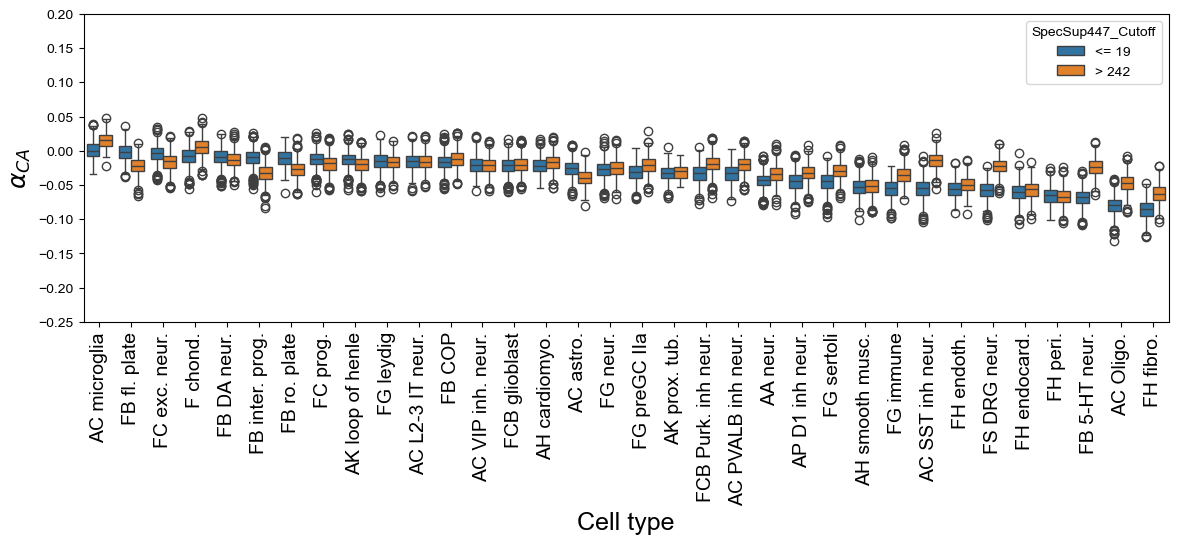

In [10]:
medians = []
ci = []
palette = {}
for ct in np.unique(df["Cell type"]):
    for binn in np.unique(df["SpecSup447_Cutoff"]):
        dff = df[(df["Cell type"].isin([ct])) & (df["SpecSup447_Cutoff"].isin([binn]))]
        dff["alpha"] = dff["alpha"].astype(float)
        dff = dff.sort_values("alpha")
        try:
            ci.append([ct, binn, list(dff["alpha"])[25], list(dff["alpha"])[975]])
            if binn == "<= 19":
                medians.append([ct, binn, np.median(dff["alpha"])])
        except:
            pass
    
df_med = pd.DataFrame(medians).sort_values(2, ascending = False)
order = list(df_med[0])

df_ci = pd.DataFrame(ci)
df_ci.columns = ["CellType", "Bin", "Lower95", "Upper95"]
df_ci = df_ci.sort_values("Lower95", ascending = False)

#for index, row in df_ci.iterrows():
#    if row["Lower95"] > 0:
#        palette[row["CellType"]] = "#F42FF5"
#    else:
#        palette[row["CellType"]] = "#40A94D"

fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(data = df, y = "alpha", x = "Cell type", order = order, hue = "SpecSup447_Cutoff")
plt.ylim(-0.25, 0.2)
plt.ylabel("$\\alpha_{CA}$", size = 18)
plt.xlabel("Cell type", size = 18)
#plt.title("All sites, non-repeats only", size = 20)
plt.xticks(rotation = 90, size = 14)
#plt.title("Positive selection in HARs across cell types", size = 25)

df_ci

In [61]:
dl_prefix = "preGC_IIaFemale"
v = pd.read_csv("Fixed_preGC_IIaFemale.txt.gz", sep = "\t")
vv = pd.read_csv("Poly_MAF0.25_preGC_IIaFemale.txt.gz", sep = "\t")


try:
    vv = add_unfold(vv)
    vv_ref = vv[vv["Human ref"] == vv["Chimp ref"]]
    vv_alt = vv[vv["Human alt"] == vv["Chimp ref"]]
    vv_ref["fixed logfc"] = -vv_ref["logfc"].astype(float)
    vv_alt["fixed logfc"] = vv_alt["logfc"].astype(float)
    vv = pd.concat([vv_ref, vv_alt])
except:
    pass

te_blacklist = pd.read_csv("BlacklistTE_Variants.txt", sep = "\t")
    
v = v[~v["Position"].isin(te_blacklist["Position"])]
vv = vv[~vv["Position"].isin(te_blacklist["Position"])]



In [57]:
cutoff_chond = (628.64197 + 639.71)/2
cutoff_lsn = (531.89703 + 520.9438)/2
cutoff_gc = (93.94034 + 93.57261)/2
cutoff_aec = (19.730724 + 19.891285)/2
cutoff_da = (47.42438 + 48.05963)/2

In [62]:
report = []
report_tests = []
for _ in [0, 1]:
    for aye in [0, 1]:
        print(aye)
        #Low spec sup bin or lowest spec sup bin
        if _ == 0:
            vs = v[(v["SpecSup447"] > 19) & (v["SpecSup447"] <= 104)]
            vvs = vv[(vv["SpecSup447"] > 19) & (vv["SpecSup447"] <= 104)]
            specsup = "19-104"
        elif _ == 1:
            vs = v[(v["SpecSup447"] <= 19)]
            vvs = vv[(vv["SpecSup447"] <= 19)]
            specsup = "<= 19"
        
        count_cut = "All"
        #Restrict to only the top 20th percentile
        if aye == 1:
            vs = vs[(vs["allele1_pred_counts"] > cutoff_gc) | (vs["allele2_pred_counts"] > cutoff_gc)]
            vvs = vvs[(vvs["allele1_pred_counts"] > cutoff_gc) | (vvs["allele2_pred_counts"] > cutoff_gc)]
            count_cut = "Top20th"
        #Join with the repeat information
        vvs.index = vvs["Position"]
        p = pd.read_csv("Pseudos_Repeats/HumPoly_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None).set_index(0)
        vvs = vvs.join(p)

        vs.index = vs["Position"]
        p = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None).set_index(0)
        vs = vs.join(p)

        keep_rs = np.intersect1d(vs[1], vvs[1])

        vs = vs[vs[1].isin(keep_rs)]
        vvs = vvs[vvs[1].isin(keep_rs)]
        
        #Count the number of repeats
        poly_c = Counter(vvs[1])
        fixed_c = Counter(vs[1])

        tot = (np.sum(list(poly_c.values()))/np.sum(list(fixed_c.values())))

        out = []
        for key in poly_c.keys():
            out.append([key, poly_c[key], fixed_c[key], (poly_c[key]/fixed_c[key])/tot])
        c = pd.DataFrame(out)
        c.sort_values(1)

        d_poly = {}
        d_fixed = {}
        for index, row in c.iterrows():
            if row[3] >= 1:
                d_poly[row[0]] = np.round(row[1]/row[3])
            else:
                d_fixed[row[0]] = np.round(row[2]*row[3])
        
        for r_cut in [100]:
            print(r_cut)
            c2 = c[(c[1] > r_cut) | (c[2] > r_cut)]
            c2 = c2.sort_values(3)
        
            for r_num in [10, 25, 40]:
                print(r_num)
                a1fhc = np.mean(vs[vs[1].isin(c2.sort_values(3).head(r_num)[0])]["allele1_pred_counts"])
                a1ftc = np.mean(vs[vs[1].isin(c2.sort_values(3).tail(r_num)[0])]["allele1_pred_counts"])
                a2fhc = np.mean(vs[vs[1].isin(c2.sort_values(3).head(r_num)[0])]["allele2_pred_counts"])
                a2ftc = np.mean(vs[vs[1].isin(c2.sort_values(3).tail(r_num)[0])]["allele2_pred_counts"])
                fha = np.mean(vs[vs[1].isin(c2.sort_values(3).head(r_num)[0])]["abs logfc"])
                fta = np.mean(vs[vs[1].isin(c2.sort_values(3).tail(r_num)[0])]["abs logfc"])
                fhl = np.mean(vs[vs[1].isin(c2.sort_values(3).head(r_num)[0])]["logfc"])
                ftl = np.mean(vs[vs[1].isin(c2.sort_values(3).tail(r_num)[0])]["logfc"])
                
                a1phc = np.mean(vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]["allele1_pred_counts"])
                a1ptc = np.mean(vvs[vvs[1].isin(c2.sort_values(3).tail(r_num)[0])]["allele1_pred_counts"])
                a2phc = np.mean(vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]["allele2_pred_counts"])
                a2ptc = np.mean(vvs[vvs[1].isin(c2.sort_values(3).tail(r_num)[0])]["allele2_pred_counts"])
                pha = np.mean(vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]["abs logfc"])
                pta = np.mean(vvs[vvs[1].isin(c2.sort_values(3).tail(r_num)[0])]["abs logfc"])
                phl = np.mean(vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]["fixed logfc"])
                ptl = np.mean(vvs[vvs[1].isin(c2.sort_values(3).tail(r_num)[0])]["fixed logfc"])
                
                report.append([specsup, count_cut, r_cut, r_num, a1fhc, a1ftc, a2fhc, a2ftc, fha, fta, fhl, ftl, a1phc, a1ptc, a2phc, a2ptc, pha, pta, phl, ptl])
                
                p_abs_h = ttest_ind(vs[vs[1].isin(c2.sort_values(3).head(r_num)[0])]["abs logfc"], vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]["abs logfc"])[1]
                p_abs_t = ttest_ind(vs[vs[1].isin(c2.sort_values(3).tail(r_num)[0])]["abs logfc"], vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]["abs logfc"])[1]
                p_log_h = ttest_ind(vs[vs[1].isin(c2.sort_values(3).head(r_num)[0])]["abs logfc"], vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]["abs logfc"])[1]
                p_log_t = ttest_ind(vs[vs[1].isin(c2.sort_values(3).tail(r_num)[0])]["abs logfc"], vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]["abs logfc"])[1]
                
                lfc_cut = 0.1
                
                vss = vs[vs[1].isin(c2.sort_values(3).head(r_num)[0])]
                vvss = vvs[vvs[1].isin(c2.sort_values(3).head(r_num)[0])]

                fh = vss[vss["logfc"] > lfc_cut].shape[0]
                fl = vss[vss["logfc"] < -lfc_cut].shape[0]

                ph = vvss[vvss["fixed logfc"] > lfc_cut].shape[0]
                pl = vvss[vvss["fixed logfc"] < -lfc_cut].shape[0]
                
                table_h_01 = [[fl, fh], [pl, ph]]
                pf_h_01 = fisher_exact(table_h_01)[1]
                orf_h_01 = fisher_exact(table_h_01)[0]
                
                lfc_cut = 0.25
                
                fh = vss[vss["logfc"] > lfc_cut].shape[0]
                fl = vss[vss["logfc"] < -lfc_cut].shape[0]

                ph = vvss[vvss["fixed logfc"] > lfc_cut].shape[0]
                pl = vvss[vvss["fixed logfc"] < -lfc_cut].shape[0]
                
                table_h_025 = [[fl, fh], [pl, ph]]
                pf_h_025 = fisher_exact(table_h_025)[1]
                orf_h_025 = fisher_exact(table_h_025)[0]
                
                lfc_cut = 0.1
                
                vss = vs[vs[1].isin(c2.sort_values(3).tail(r_num)[0])]
                vvss = vvs[vvs[1].isin(c2.sort_values(3).tail(r_num)[0])]

                fh = vss[vss["logfc"] > lfc_cut].shape[0]
                fl = vss[vss["logfc"] < -lfc_cut].shape[0]

                ph = vvss[vvss["fixed logfc"] > lfc_cut].shape[0]
                pl = vvss[vvss["fixed logfc"] < -lfc_cut].shape[0]
                
                table_t_01 = [[fl, fh], [pl, ph]]
                pf_t_01 = fisher_exact(table_t_01)[1]
                orf_t_01 = fisher_exact(table_t_01)[0]
                
                lfc_cut = 0.25
                
                fh = vss[vss["logfc"] > lfc_cut].shape[0]
                fl = vss[vss["logfc"] < -lfc_cut].shape[0]

                ph = vvss[vvss["fixed logfc"] > lfc_cut].shape[0]
                pl = vvss[vvss["fixed logfc"] < -lfc_cut].shape[0]
                
                table_t_025 = [[fl, fh], [pl, ph]]
                pf_t_025 = fisher_exact(table_t_025)[1]
                orf_t_025 = fisher_exact(table_t_025)[0]
                
                report_tests.append([specsup, count_cut, r_cut, r_num, p_abs_h, p_abs_t, p_log_h, p_log_t, table_h_01, pf_h_01, orf_h_01, table_h_025, pf_h_025, orf_h_025, table_t_01, pf_t_01, orf_t_01, table_t_025, pf_t_025, orf_t_025])

0
100
10
25
40
1
100
10
25
40
0
100
10
25
40
1
100
10
25
40


In [63]:

df1 = pd.DataFrame(report)
df1.columns = ["SpecSupBin", "Top20th", "NumVarRepeatCutoff", "NumRepeats", "FixedAllele1MeanCount_FB", "FixedAllele1MeanCount_PB", "FixedAllele2MeanCount_FB", "FixedAllele2MeanCount_PB", "FixedAbsLogfcMean_FB", "FixedAbsLogfcMean_PB", "FixedLogfcMean_FB", "FixedLogfcMean_PB", \
              "PolyAllele1MeanCount_FB", "PolyAllele1MeanCount_PB", "PolyAllele2MeanCount_FB", "PolyAllele2MeanCount_PB", "PolyAbsLogfcMean_FB", "PolyAbsLogfcMean_PB", "PolyLogfcMean_FB", "PolyLogfcMean_PB"]
df1.to_csv("Report_Repeats_" + dl_prefix + ".txt", sep = "\t", index = False)
df2 = pd.DataFrame(report_tests)
df2.columns = ["SpecSupBin", "Top20th", "NumVarRepeatCutoff", "NumRepeats", "Ttest_p_AbsLogfc_FB", "Ttest_p_AbsLogfc_PB", "Ttest_p_Logfc_FB", "Ttest_p_Logfc_PB", "TableCut0.1_FB", "PvalCut0.1_FB", "ORCut0.1_FB", "TableCut0.25_FB", "PvalCut0.25_FB", "ORCut0.25_FB", "TableCut0.1_PB", "PvalCut0.1_PB", "ORCut0.1_PB", "TableCut0.25_PB", "PvalCut0.25_PB", "ORCut0.25_PB"]

In [64]:
df2.sort_values("ORCut0.1_FB", ascending = False)

,SpecSupBin,Top20th,NumVarRepeatCutoff,NumRepeats,Ttest_p_AbsLogfc_FB,Ttest_p_AbsLogfc_PB,Ttest_p_Logfc_FB,Ttest_p_Logfc_PB,TableCut0.1_FB,PvalCut0.1_FB,ORCut0.1_FB,TableCut0.25_FB,PvalCut0.25_FB,ORCut0.25_FB,TableCut0.1_PB,PvalCut0.1_PB,ORCut0.1_PB,TableCut0.25_PB,PvalCut0.25_PB,ORCut0.25_PB
3,19-104,Top20th,100,10,0.158229,1.139492e-08,0.158229,1.139492e-08,"[[218, 217], [45, 58]]",0.273272,1.294828,"[[56, 68], [18, 17]]",0.567396,0.777778,"[[185, 255], [76, 113]]",0.724174,1.078689,"[[48, 77], [8, 28]]",0.077905,2.181818
9,<= 19,Top20th,100,10,0.761997,5.179545e-02,0.761997,5.179545e-02,"[[239, 270], [54, 68]]",0.614455,1.114678,"[[67, 65], [13, 15]]",0.835520,1.189349,"[[144, 209], [62, 89]]",1.000000,0.989042,"[[35, 45], [17, 20]]",0.843843,0.915033
0,19-104,All,100,10,0.472254,5.911543e-01,0.472254,5.911543e-01,"[[118, 158], [22, 31]]",0.880920,1.052359,"[[25, 36], [2, 6]]",0.467488,2.083333,"[[138, 165], [77, 76]]",0.371482,0.825502,"[[31, 28], [13, 17]]",0.502713,1.447802
4,19-104,Top20th,100,25,0.145824,7.741218e-64,0.145824,7.741218e-64,"[[635, 670], [147, 157]]",0.949238,1.012235,"[[162, 197], [44, 45]]",0.478138,0.841024,"[[643, 738], [222, 294]]",0.178153,1.153849,"[[136, 156], [42, 63]]",0.254897,1.307692
5,19-104,Top20th,100,40,0.626476,8.989878e-46,0.626476,8.989878e-46,"[[937, 1042], [226, 253]]",0.959364,1.006663,"[[252, 310], [64, 64]]",0.325780,0.812903,"[[959, 1116], [335, 443]]",0.139472,1.136353,"[[208, 234], [60, 90]]",0.154443,1.333333
10,<= 19,Top20th,100,25,0.646421,3.117979e-02,0.646421,3.117979e-02,"[[540, 634], [155, 178]]",0.900897,0.978122,"[[137, 148], [41, 44]]",1.000000,0.993408,"[[763, 1028], [319, 399]]",0.422176,0.928354,"[[206, 201], [80, 78]]",1.000000,0.999254
7,<= 19,All,100,25,0.591845,2.648070e-09,0.591845,2.648070e-09,"[[502, 544], [113, 117]]",0.770998,0.955459,"[[94, 92], [23, 23]]",1.000000,1.021739,"[[552, 561], [292, 246]]",0.083007,0.828950,"[[78, 93], [57, 36]]",0.020124,0.529711
2,19-104,All,100,40,0.223293,3.204520e-01,0.223293,3.204520e-01,"[[661, 760], [167, 181]]",0.631980,0.942649,"[[112, 162], [20, 33]]",0.760252,1.140741,"[[797, 1043], [323, 427]]",0.930332,1.010181,"[[155, 200], [59, 81]]",0.840396,1.063983
1,19-104,All,100,25,0.239558,4.497399e-01,0.239558,4.497399e-01,"[[300, 377], [78, 90]]",0.664890,0.918180,"[[63, 85], [9, 16]]",0.662224,1.317647,"[[427, 546], [186, 229]]",0.767996,0.962848,"[[92, 111], [37, 49]]",0.795994,1.097638
11,<= 19,Top20th,100,40,0.573623,4.906916e-01,0.573623,4.906916e-01,"[[2587, 3317], [908, 1062]]",0.079423,0.912199,"[[573, 734], [197, 215]]",0.172707,0.851983,"[[2726, 3571], [1028, 1214]]",0.037420,0.901491,"[[621, 743], [223, 232]]",0.211881,0.869533


In [65]:
fisher_exact([[105, 630], [16, 133]])

SignificanceResult(statistic=1.3854166666666667, pvalue=0.2961007204734055)

In [75]:
v2_fore = v_mis2[v_mis2["PhyloP447"] > 5]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("HighlyConserved_Nonsyn.bed", sep = "\t", header = None, index = None)

v_mis2["Chrom"] = [x.split(":")[0] for x in v_mis2["Position"]]
v_mis2["Pos1"] = [int(x.split(":")[1]) for x in v_mis2["Position"]]
v_mis2["Pos2"] = [int(x.split(":")[1]) + 1 for x in v_mis2["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, v_mis2[v_mis2["PhyloP447"] < 1]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("HighlyConserved_Nonsyn_Background.bed", sep = "\t", header = None, index = None)


C:\Users\astar\AppData\Local\Temp\ipykernel_15424\2565413326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_15424\2565413326.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_15424\2565413326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

0.007537198184040146


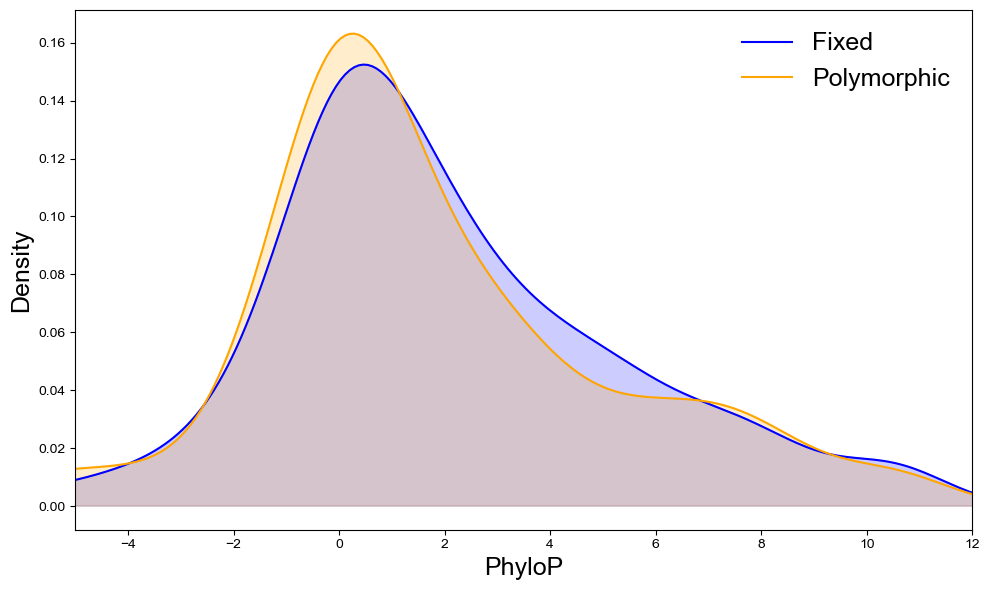

In [79]:
pli = pd.read_csv("gnomad.v4.1.constraint_metrics.tsv", sep = "\t")
pli = pli.dropna()
pli = pli[pli["lof.pLI"] > 0.9]
keep_pli = pli["gene"]

#v_mis, vv_mis = read_missense(path = "./", maf_cut = 0.01)
#vv_mis = unfold_missense(vv_mis)

v_mis2 = v_mis[v_mis["Gene"].isin(np.setdiff1d(keep_pli, sfari["SFARI"]))]
vv_mis2 = vv_mis[vv_mis["Gene"].isin(np.setdiff1d(keep_pli, sfari["SFARI"]))]

vv_mis3 = vv_mis2[(vv_mis2["UnfoldedMAF"] > 0.5) & (vv_mis2["UnfoldedMAF"] < 0.9)]

yvals2 = [np.float64(j) for j in list(vv_mis3["PhyloP447"])]
yvals2.sort()

cuttt = 0.6
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

vvv = prepare_alpha(v_mis2, vv_mis3)
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)

print((fisher_exact(alpha[-3], alternative = "greater")[1] + fisher_exact(alpha[-2], alternative = "greater")[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

0.2535301396042643


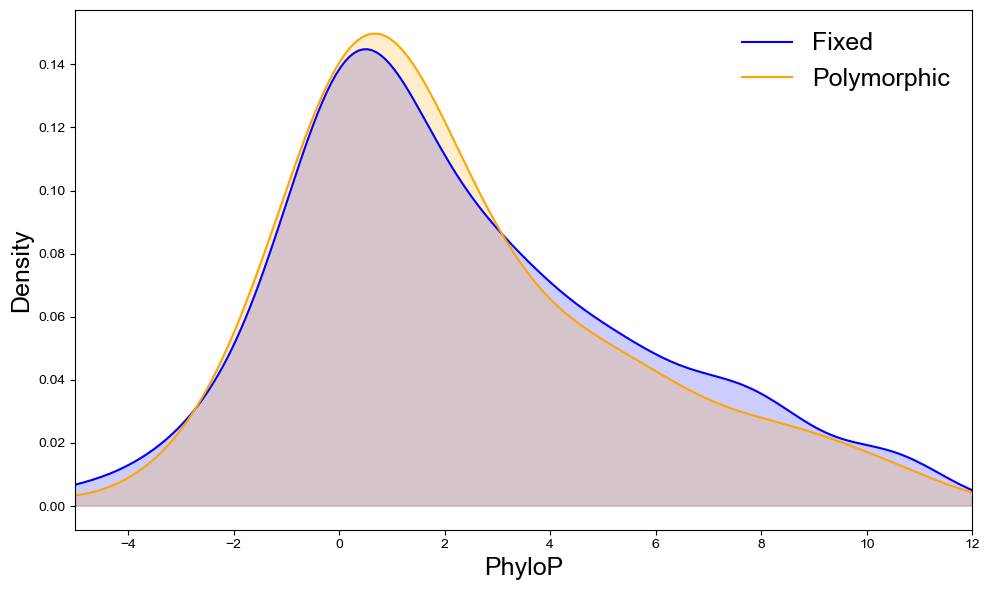

In [80]:
pli = pd.read_csv("gnomad.v4.1.constraint_metrics.tsv", sep = "\t")
pli = pli.dropna()
pli = pli[pli["lof.pLI"] > 0.9]
keep_pli = pli["gene"]

#v_mis, vv_mis = read_missense(path = "./", maf_cut = 0.01)
#vv_mis = unfold_missense(vv_mis)

v_mis2 = v_mis[v_mis["Gene"].isin(np.intersect1d(keep_pli, sfari["SFARI"]))]
vv_mis2 = vv_mis[vv_mis["Gene"].isin(np.intersect1d(keep_pli, sfari["SFARI"]))]

vv_mis3 = vv_mis2[(vv_mis2["UnfoldedMAF"] > 0.5) & (vv_mis2["UnfoldedMAF"] < 0.9)]

yvals2 = [np.float64(j) for j in list(vv_mis3["PhyloP447"])]
yvals2.sort()

cuttt = 0.8
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

vvv = prepare_alpha(v_mis2, vv_mis3)
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)

print((fisher_exact(alpha[-3], alternative = "greater")[1] + fisher_exact(alpha[-2], alternative = "greater")[1])/2)

(29874, 12)
(29720, 12)
(29720, 12)
(29720, 12)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

0.004676128037190593


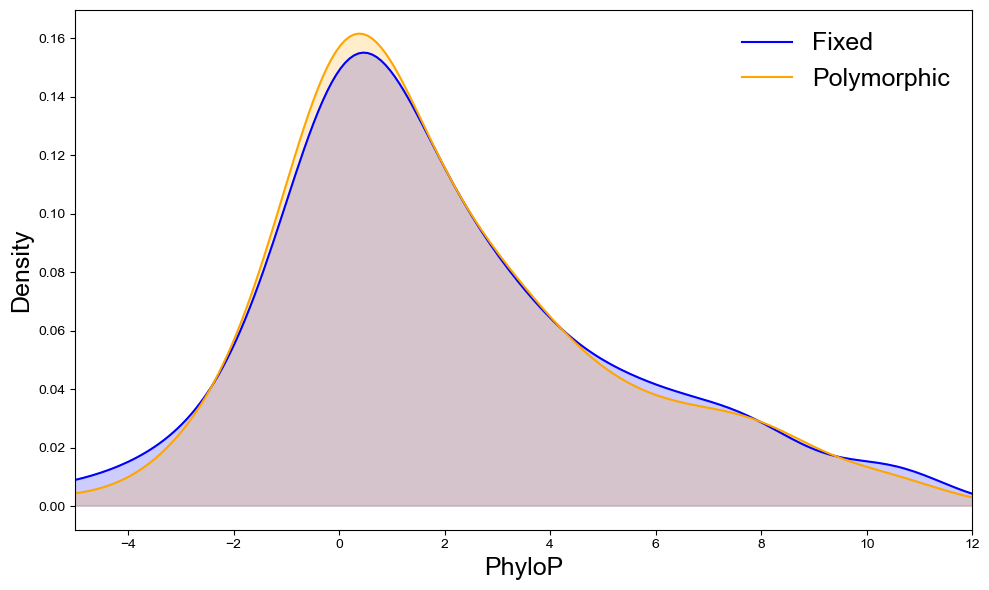

In [76]:
sfari = pd.read_csv("SFARI-Gene_genes_03-28-2024release_05-09-2024export.csv")
#sfari = sfari[sfari["gene-score"] == 1]
sfari = {"SFARI":list(sfari["gene-symbol"])}

v_mis, vv_mis = read_missense(path = "./", maf_cut = 0.01)
vv_mis = unfold_missense(vv_mis)

v_mis2 = v_mis[v_mis["Gene"].isin(sfari["SFARI"])]
vv_mis2 = vv_mis[vv_mis["Gene"].isin(sfari["SFARI"])]

vv_mis3 = vv_mis2[(vv_mis2["UnfoldedMAF"] > 0.5) & (vv_mis2["UnfoldedMAF"] < 0.9)]

yvals2 = [np.float64(j) for j in list(vv_mis3["PhyloP447"])]
yvals2.sort()

cuttt = 0.6
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]

vvv = prepare_alpha(v_mis2, vv_mis3)
compute_alpha_cutoff(vvv, plot = True, cutoff = cutoff)

print((fisher_exact(alpha[-3], alternative = "greater")[1] + fisher_exact(alpha[-2], alternative = "greater")[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.03098684429692078, 0.2, [[32773, 818908], [9790, 252448]], [[32773, 818908], [9790, 252448]], <Figure size 1000x600 with 1 Axes>)
0.0036673532036383865


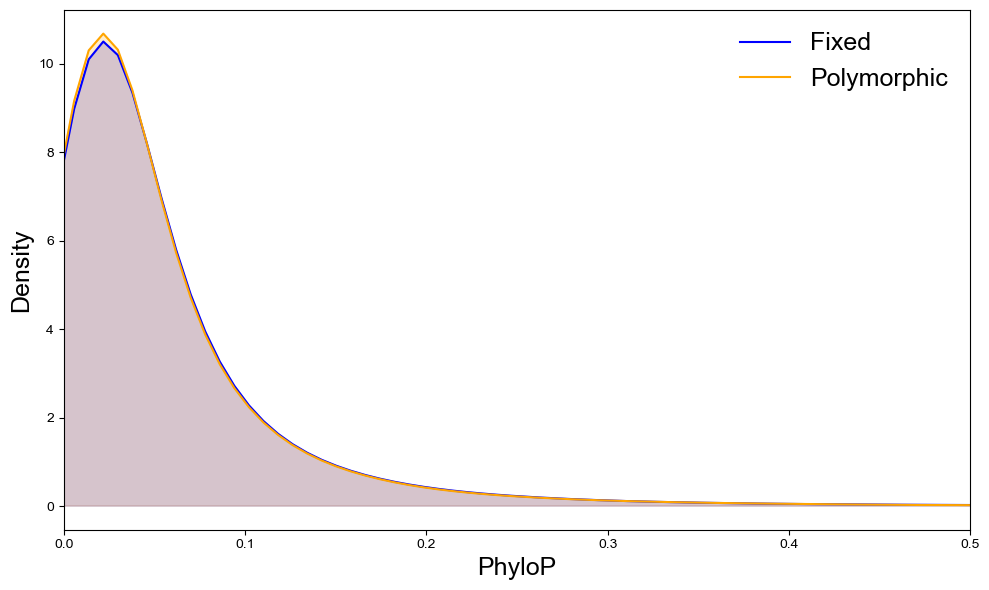

In [175]:


#vs = v[(v["SpecSup447"] <= 19)]
#vvs = vv[(vv["SpecSup447"] <= 19)]

#vs = vs[(vs["allele1_pred_counts"] > cutoff_chond) | (vs["allele2_pred_counts"] > cutoff_chond)]
#vvs = vvs[(vvs["allele1_pred_counts"] > cutoff_chond) | (vvs["allele2_pred_counts"] > cutoff_chond)]

vvv = prepare_alpha(vs, vvs, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.2, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

(0.016672435735387348, 0.2, [[4418, 99084], [1263, 28806]], [[4418, 99084], [1263, 28806]], <Figure size 1000x600 with 1 Axes>)
0.30944622755281503


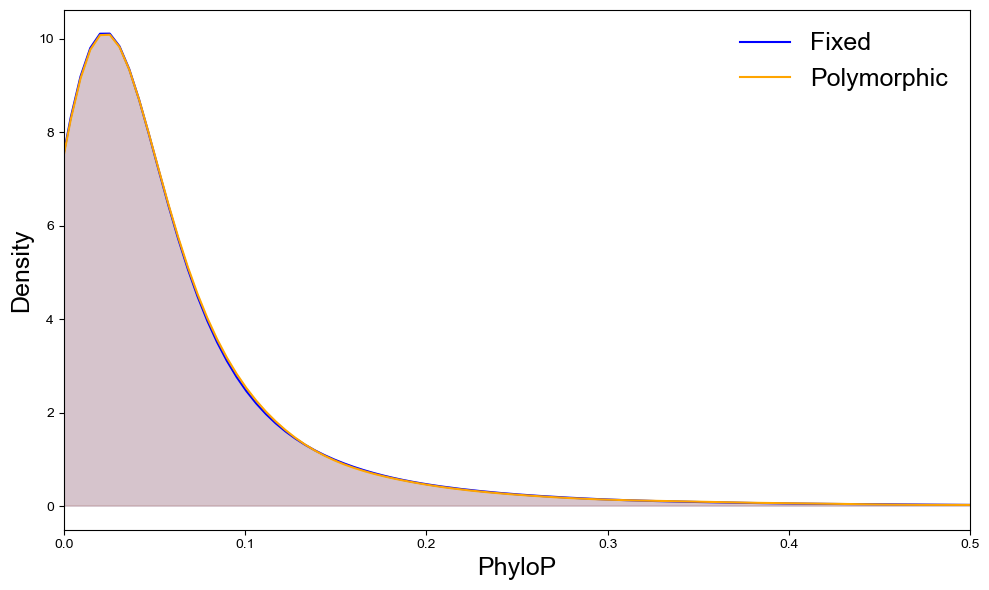

In [176]:
vsr, vvsr = remove_repeats(vs, vvs)
vsr, vvsr = remove_pseudos(vsr, vvsr)

vvv = prepare_alpha(vsr, vvsr, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.2, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.03207977092756775, 0.2, [[28355, 719824], [8527, 223642]], [[28355, 719824], [8527, 223642]], <Figure size 1000x600 with 1 Axes>)
0.004793817096701077


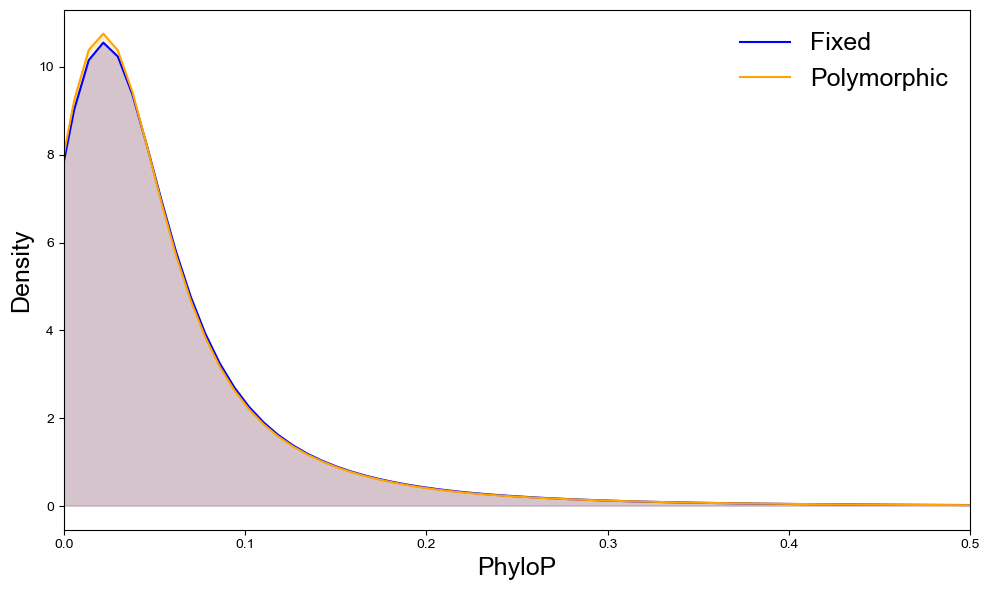

In [177]:
vsro = vs[~vs["Position"].isin(vsr["Position"])]
vvsro = vvs[~vvs["Position"].isin(vvsr["Position"])]
vvv = prepare_alpha(vsro, vvsro, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.2, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

In [180]:
#Above implies it is driven somewhat by repeat regions, though alpha is still positive for non-repeat regions if doing Top20th



In [96]:
vsro = vs[~vs["Position"].isin(vsr["Position"])]
vvsro = vvs[~vvs["Position"].isin(vvsr["Position"])]


In [206]:
def balance_repeats(vs, vvs):
    #vvs.index = vvs["Position"]
    #p = pd.read_csv("Pseudos_Repeats/HumPoly_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None).set_index(0)
    #vvs = vvs.join(p)

    #vs.index = vs["Position"]
    #p = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None).set_index(0)
    #vs = vs.join(p)
    
    keep_rs = np.intersect1d(vs[1], vvs[1])

    vs = vs[vs[1].isin(keep_rs)]
    vvs = vvs[vvs[1].isin(keep_rs)]

    poly_c = Counter(vvs[1])
    fixed_c = Counter(vs[1])

    tot = (np.sum(list(poly_c.values()))/np.sum(list(fixed_c.values())))

    out = []
    for key in poly_c.keys():
        out.append([key, poly_c[key], fixed_c[key], (poly_c[key]/fixed_c[key])/tot])
    c = pd.DataFrame(out)
    c.sort_values(1)

    d_poly = {}
    d_fixed = {}
    for index, row in c.iterrows():
        if row[3] >= 1:
            d_poly[row[0]] = np.round(row[1]/row[3])
        else:
            d_fixed[row[0]] = np.round(row[2]*row[3])
    
    new_vvs = pd.DataFrame()
    new_vs = pd.DataFrame()

    for key in d_poly.keys():
        new_vs = pd.concat([new_vs, vs[vs[1].isin([key])]])
        new_vvs = pd.concat([new_vvs, vvs[vvs[1].isin([key])].sample(n = int(d_poly[key]), replace = False)])

    for key in d_fixed.keys():
        new_vvs = pd.concat([new_vvs, vvs[vvs[1].isin([key])]])
        new_vs = pd.concat([new_vs, vs[vs[1].isin([key])].sample(n = int(d_fixed[key]), replace = False)])

    poly_c_new = Counter(new_vvs[1])
    fixed_c_new = Counter(new_vs[1])

    tot = (np.sum(list(poly_c_new.values()))/np.sum(list(fixed_c_new.values())))

    out = []
    for key in poly_c.keys():
        out.append([key, poly_c_new[key], fixed_c_new[key], (poly_c_new[key]/fixed_c_new[key])/tot])
    c_new = pd.DataFrame(out)

    exclude = []
    for index, row in c_new.iterrows():
        if row[3] < 0.9 or row[3] > 1/0.9:
            exclude.append(row[0])
    new_vs = new_vs[~new_vs[1].isin(exclude)]
    new_vvs = new_vvs[~new_vvs[1].isin(exclude)]
    
    return new_vs, new_vvs

In [208]:
vs_bal

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,1
Position,,,,,,,,,,,,,,,
chr1:1385179,chr1:1385179,chr1:1385179,AURKAIP1,9828,0.470,0.001,95,0.002100,1145.22720,1146.89500,0.002100,Fixed,.,.,AluSc
chr1:1385181,chr1:1385181,chr1:1385181,AURKAIP1,9830,0.472,0.001,95,-0.000314,1148.72440,1148.47450,0.000314,Fixed,.,.,AluSc
chr1:1385191,chr1:1385191,chr1:1385191,AURKAIP1,9840,-0.745,0.000,95,-0.000669,1162.24730,1161.70890,0.000669,Fixed,.,.,AluSc
chr1:1531183,chr1:1531183,chr1:1531183,TMEM240,9298,-20.000,0.000,78,-0.020863,386.69098,381.13916,0.020863,Fixed,.,.,AluSc
chr1:1655651,chr1:1655651,chr1:1655651,CDK11B,1723,-4.416,0.000,88,0.017756,673.31410,681.65216,0.017756,Fixed,.,.,AluSc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr20:4698325,chr20:4698325,chr20:4698325,PRNP,11933,-0.734,0.000,104,-0.037463,142.51495,138.86182,0.037463,Fixed,.,.,MER124
chr7:152955620,chr7:152955620,chr7:152955620,ACTR3B,195862,-0.243,0.000,73,0.010775,556.30540,560.47595,0.010775,Fixed,.,.,MER124
chr21:34636678,chr21:34636678,chr21:34636678,CLIC6,32332,-1.013,0.000,85,-0.002286,488.88110,488.10720,0.002286,Fixed,.,.,LTR108d_Mam


In [98]:
vsro_bal, vvsro_bal = balance_repeats(vsro, vvsro)
vsro_bal

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,1
Position,,,,,,,,,,,,,,,
chr1:1694225,chr1:1694225,chr1:1694225,SLC35E2B,1550,-0.928,0.000,80,0.000052,2683.32250,2683.4187,0.000052,Fixed,.,.,AluSx3
chr1:1694280,chr1:1694280,chr1:1694280,SLC35E2B,1604,-0.296,0.000,80,0.029708,2177.39970,2222.7020,0.029708,Fixed,.,.,AluSx3
chr1:1694287,chr1:1694287,chr1:1694287,SLC35E2B,1612,0.517,0.000,80,0.003259,2125.25100,2130.0576,0.003259,Fixed,.,.,AluSx3
chr1:2018292,chr1:2018292,chr1:2018292,GABRD,1082,-0.373,0.006,102,0.005138,1361.16430,1366.0210,0.005138,Fixed,.,.,AluSx3
chr1:6347640,chr1:6347640,chr1:6347640,ACOT7,45724,-2.360,0.000,104,0.005792,1339.05150,1344.4377,0.005792,Fixed,.,.,AluSx3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr7:157870557,chr7:157870557,chr7:157870557,DNAJB6,533524,-0.019,0.001,102,-0.014435,1644.48610,1628.1139,0.014435,Fixed,.,.,HSMAR2
chr21:45219583,chr21:45219583,chr21:45219583,POFUT2,68292,0.102,0.835,104,-0.328448,2543.25930,2025.4333,0.328448,Fixed,.,.,HSMAR2
chr10:12699391,chr10:12699391,chr10:12699391,CCDC3,302321,-2.743,0.000,103,-0.077742,1272.03690,1205.3048,0.077742,Fixed,.,.,HSMAR2


(0.019625421818268984, 0.1, [[114707, 738079], [35288, 231605]], [[114707, 738079], [35288, 231605]], <Figure size 1000x600 with 1 Axes>)
0.0012131156810159932


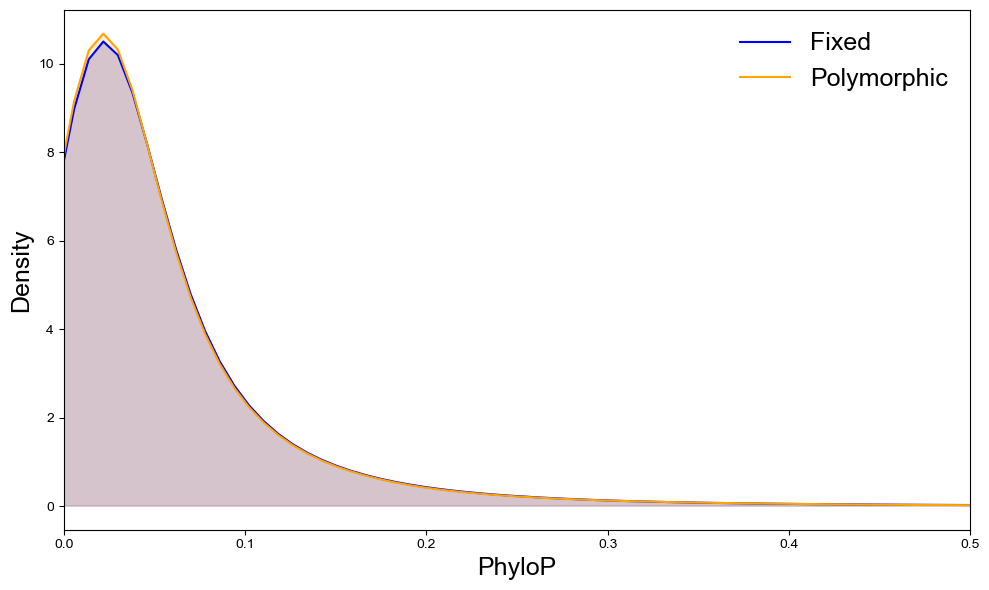

In [209]:
vvv = prepare_alpha(vs, vvs, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.1, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

(-0.003606100560548997, 0.1, [[108459, 706279], [34050, 220935]], [[108459, 706279], [34050, 220935]], <Figure size 1000x600 with 1 Axes>)
0.7064553801646878


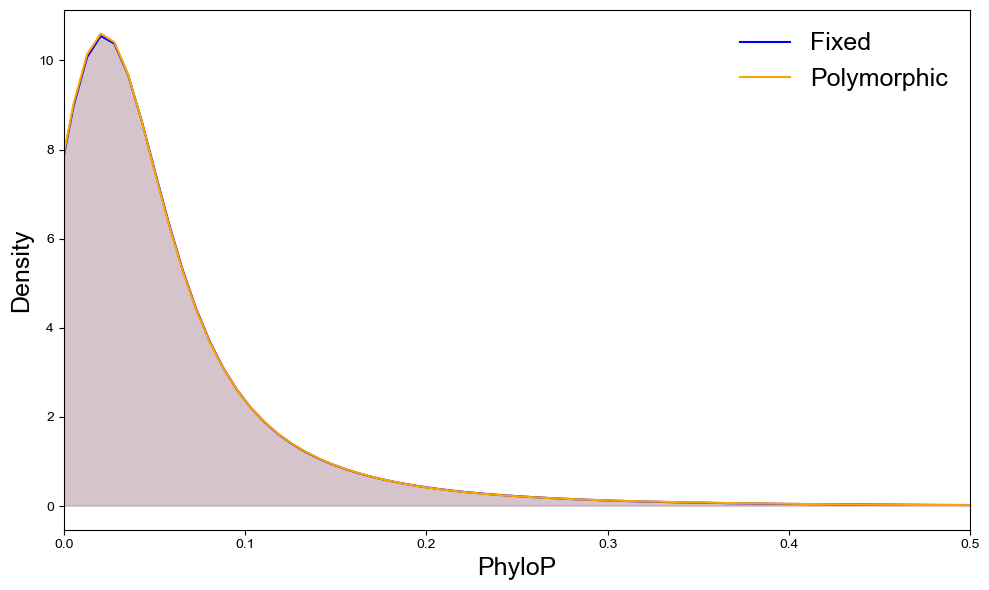

In [207]:
vs_bal, vvs_bal = balance_repeats(vs, vvs)

vvv = prepare_alpha(vs_bal, vvs_bal, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.1, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

In [14]:
vvs

,Unnamed: 0,Position,MAFMaxAcrossAncestry,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,Human ref,Human alt,Chimp ref,Gorilla ref,UnfoldedMAF,fixed logfc,1
Position,,,,,,,,,,,,,,,,,,,
chr10:100814344,chr10:100814344-T-C,chr10:100814344,0.560224,PAX2,68674,0.193,0.004,19,0.016627,877.75385,887.92820,0.016627,T,C,T,T,0.560224,-0.016627,AluSc8
chr10:101353111,chr10:101353111-T-G,chr10:101353111,0.385014,BTRC,0,0.193,0.156,19,0.063295,634.24230,662.68756,0.063295,T,G,T,T,0.385014,-0.063295,L1M5
chr10:101576495,chr10:101576495-C-T,chr10:101576495,0.457196,POLL,11742,1.907,0.009,19,-0.004270,959.91156,957.07446,0.004270,C,T,C,C,0.457196,0.004270,AluSx
chr10:1022909,chr10:1022909-C-T,chr10:1022909,0.387832,IDI2,2949,0.190,0.003,11,-0.023252,1116.12890,1098.28440,0.023252,C,T,C,C,0.387832,0.023252,.
chr10:102466184,chr10:102466184-G-A,chr10:102466184,0.288927,TMEM180,4800,0.240,0.015,19,-0.023711,738.32874,726.29330,0.023711,G,A,G,G,0.288927,0.023711,MIRb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrX:981633,chrX:981633-A-G,chrX:981633,0.685934,CRLF2,231040,0.138,0.024,6,0.068897,1052.78870,1104.28500,0.068897,A,G,G,G,0.314066,0.068897,LTR8
chrX:9927953,chrX:9927953-G-A,chrX:9927953,0.337035,LOC100288814,39405,-0.041,0.000,18,0.042348,1032.81310,1063.57870,0.042348,G,A,A,A,0.662965,0.042348,.
chrX:99371731,chrX:99371731-C-T,chrX:99371731,0.453079,PCDH19,1038462,0.193,0.011,19,-0.061934,1582.55790,1516.05740,0.061934,C,T,T,T,0.546921,-0.061934,LTR12E


In [15]:
vs = v[(v["SpecSup447"] > 19) & (v["SpecSup447"] <= 104)]
vvs = vv[(vv["SpecSup447"] > 19) & (vv["SpecSup447"] <= 104)]
vs = vs[(vs["allele1_pred_counts"] > cutoff_chond) | (vs["allele2_pred_counts"] > cutoff_chond)]
vvs = vvs[(vvs["allele1_pred_counts"] > cutoff_chond) | (vvs["allele2_pred_counts"] > cutoff_chond)]
 

In [16]:
vvs.index = vvs["Position"]
p = pd.read_csv("Pseudos_Repeats/HumPoly_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None).set_index(0)
vvs = vvs.join(p)

vs.index = vs["Position"]
p = pd.read_csv("Pseudos_Repeats/HumChp_NC_Final_CREs_NoHLA_rmsk.txt", sep = "\t", header = None).set_index(0)
vs = vs.join(p)

keep_rs = np.intersect1d(vs[1], vvs[1])

vs = vs[vs[1].isin(keep_rs)]
vvs = vvs[vvs[1].isin(keep_rs)]

poly_c = Counter(vvs[1])
fixed_c = Counter(vs[1])

tot = (np.sum(list(poly_c.values()))/np.sum(list(fixed_c.values())))

out = []
for key in poly_c.keys():
    out.append([key, poly_c[key], fixed_c[key], (poly_c[key]/fixed_c[key])/tot])
c = pd.DataFrame(out)
c.sort_values(1)

d_poly = {}
d_fixed = {}
for index, row in c.iterrows():
    if row[3] >= 1:
        d_poly[row[0]] = np.round(row[1]/row[3])
    else:
        d_fixed[row[0]] = np.round(row[2]*row[3])


In [39]:
c2 = c[(c[1] > 100) | (c[2] > 100)]
c2 = c2.sort_values(3)
c2

,0,1,2,3
384,L1PBb,20,105,0.583206
64,L1ME3G,21,108,0.595356
373,L1MB8,26,133,0.598553
12,L1ME1,35,176,0.608887
489,PRIMA41-int,22,106,0.635474
...,...,...,...,...
31,LTR7C,42,102,1.260754
191,L1MCa,49,118,1.271438
238,L1PA12,90,206,1.337693
154,MLT1D,70,151,1.419392


(0.026170711879704323, 0.1, [[11968, 63547], [3837, 20921]], [[11968, 63547], [3837, 20921]], <Figure size 1000x600 with 1 Axes>)
0.09608906263274236


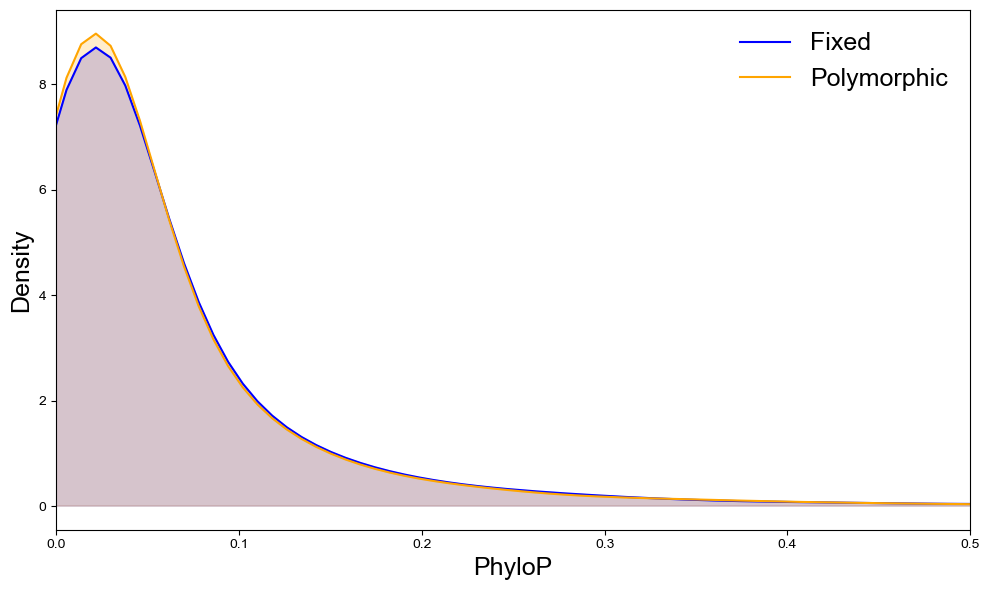

In [100]:
vvv = prepare_alpha(vsro_bal, vvsro_bal, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.1, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

In [46]:
k = 25
print(np.mean(vs[vs[1].isin(c2.sort_values(3).head(k)[0])]["allele1_pred_counts"]))
print(np.mean(vs[vs[1].isin(c2.sort_values(3).tail(k)[0])]["allele1_pred_counts"]))
print(np.mean(vs[vs[1].isin(c2.sort_values(3).head(k)[0])]["abs logfc"]))
print(np.mean(vs[vs[1].isin(c2.sort_values(3).tail(k)[0])]["abs logfc"]))

print(np.mean(vvs[vvs[1].isin(c2.sort_values(3).head(k)[0])]["allele1_pred_counts"]))
print(np.mean(vvs[vvs[1].isin(c2.sort_values(3).tail(k)[0])]["allele1_pred_counts"]))
print(np.mean(vvs[vvs[1].isin(c2.sort_values(3).head(k)[0])]["abs logfc"]))
print(np.mean(vvs[vvs[1].isin(c2.sort_values(3).tail(k)[0])]["abs logfc"]))

1166.4430035302166
1097.6743773343812
0.07602469258035545
0.03596661385495288
1134.206409313052
1079.514133401629
0.0751626883277164
0.03533951201297315


In [47]:
ttest_ind(vs[vs[1].isin(c2.sort_values(3).head(k)[0])]["logfc"], vvs[vvs[1].isin(c2.sort_values(3).head(k)[0])]["fixed logfc"])

TtestResult(statistic=-1.8746734492072978, pvalue=0.06089157874856504, df=5402.0)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.22696855785486925, 0.1, [[478, 3907], [133, 886]], [[478, 3907], [133, 886]], <Figure size 1000x600 with 1 Axes>)
0.976353588085675


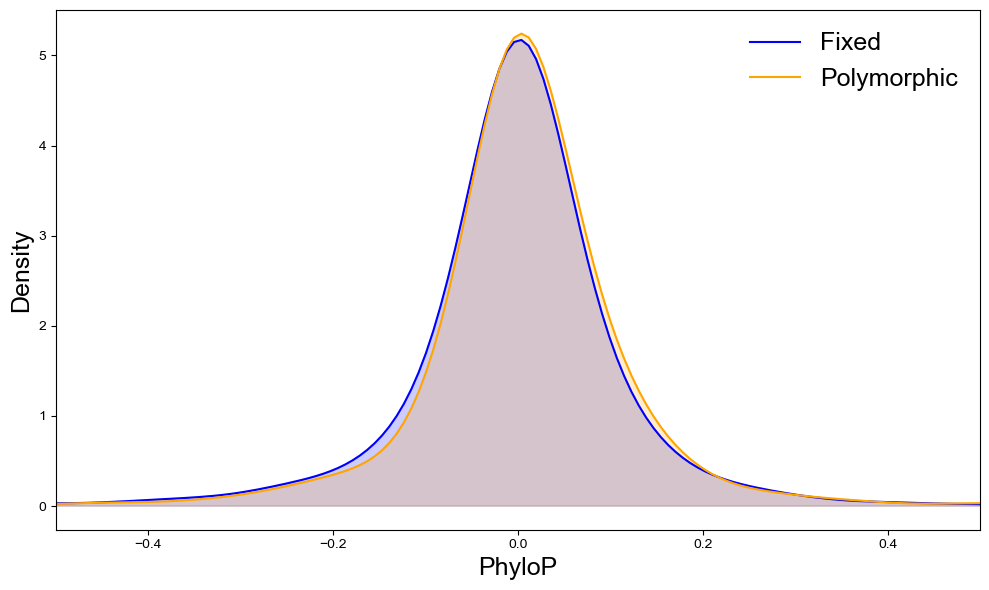

In [48]:
vs["fixed logfc"] = vs["logfc"]
vvv = prepare_alpha(vs[vs[1].isin(c2.sort_values(3).head(k)[0])], vvs[vvs[1].isin(c2.sort_values(3).head(k)[0])], stat = "fixed logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.1, window = [-0.5, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(-0.13021300036724215, 0.1, [[1050, 3831], [482, 1556]], [[1050, 3831], [482, 1556]], <Figure size 1000x600 with 1 Axes>)
0.9760379432809669


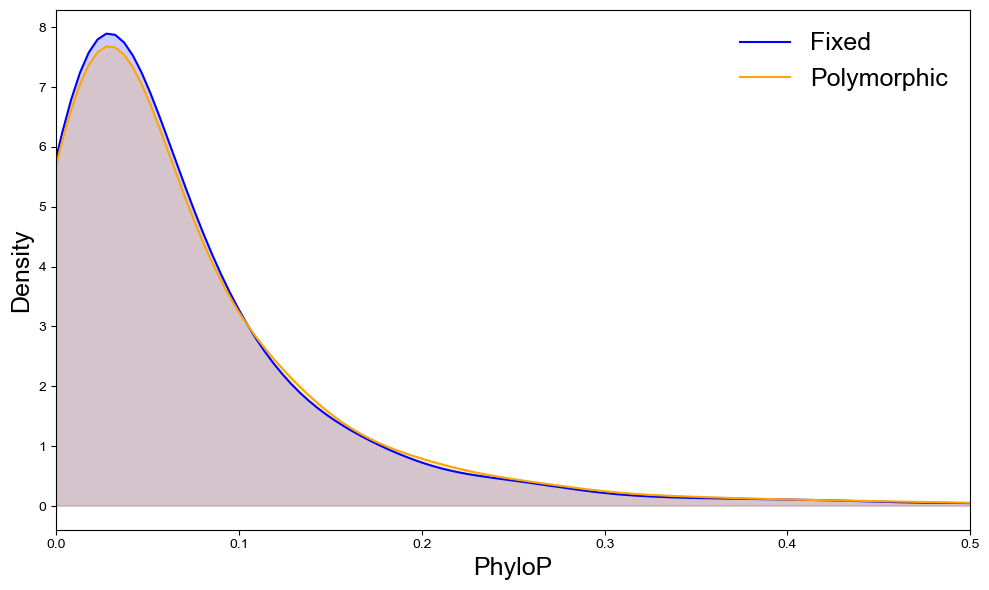

In [202]:
vvv = prepare_alpha(vs[vs[1].isin(c2.sort_values(3).tail(k)[0])], vvs[vvs[1].isin(c2.sort_values(3).tail(k)[0])], stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.1, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

In [35]:
df2

,SpecSupBin,Top20th,NumVarRepeatCutoff,NumRepeats,Ttest_p_AbsLogfc_FB,Ttest_p_AbsLogfc_PB,Ttest_p_Logfc_FB,Ttest_p_Logfc_PB,TableCut0.1_FB,PvalCut0.1_FB,ORCut0.1_FB,TableCut0.25_FB,PvalCut0.25_FB,ORCut0.25_FB,TableCut0.1_PB,PvalCut0.1_PB,ORCut0.1_PB,TableCut0.25_PB,PvalCut0.25_PB,ORCut0.25_PB
0,19-104,All,100,10,0.607142,6.696821e-01,0.607142,6.696821e-01,"[[162, 136], [31, 22]]",0.653835,0.845351,"[[35, 27], [6, 8]]",0.388872,1.728395,"[[42, 49], [27, 22]]",0.376354,0.698413,"[[42, 49], [27, 22]]",0.376354,0.698413
1,19-104,All,100,20,0.855266,1.306040e-01,0.855266,1.306040e-01,"[[335, 298], [66, 64]]",0.699988,1.090096,"[[61, 63], [10, 14]]",0.514094,1.355556,"[[75, 89], [35, 43]]",1.000000,1.035313,"[[75, 89], [35, 43]]",1.000000,1.035313
2,19-104,All,250,10,0.907335,6.078192e-01,0.907335,6.078192e-01,"[[405, 395], [89, 102]]",0.334379,1.175082,"[[83, 92], [18, 20]]",1.000000,1.002415,"[[87, 102], [41, 35]]",0.277631,0.728121,"[[87, 102], [41, 35]]",0.277631,0.728121
3,19-104,All,250,20,0.873050,5.565291e-21,0.873050,5.565291e-21,"[[804, 838], [194, 218]]",0.508604,1.078119,"[[159, 177], [37, 43]]",0.901222,1.043976,"[[634, 855], [229, 322]]",0.686725,1.042662,"[[634, 855], [229, 322]]",0.686725,1.042662
4,19-104,All,500,10,0.803376,1.376155e-49,0.803376,1.376155e-49,"[[1079, 1245], [262, 358]]",0.069435,1.184224,"[[202, 250], [41, 70]]",0.164376,1.379512,"[[607, 830], [200, 298]]",0.429283,1.089675,"[[607, 830], [200, 298]]",0.429283,1.089675
5,19-104,All,500,20,0.772863,3.078794e-223,0.772863,3.078794e-223,"[[2150, 2369], [533, 670]]",0.043915,1.140830,"[[393, 466], [94, 128]]",0.405283,1.148388,"[[897, 1258], [280, 434]]",0.272501,1.105207,"[[897, 1258], [280, 434]]",0.272501,1.105207
6,19-104,Top20th,100,10,0.639361,2.253108e-05,0.639361,2.253108e-05,"[[172, 164], [43, 23]]",0.042976,0.560976,"[[40, 49], [11, 9]]",0.463902,0.667904,"[[45, 37], [13, 20]]",0.152805,1.871102,"[[45, 37], [13, 20]]",0.152805,1.871102
7,19-104,Top20th,100,20,0.272417,3.268523e-29,0.272417,3.268523e-29,"[[382, 401], [96, 68]]",0.025518,0.674771,"[[83, 101], [21, 19]]",0.484581,0.743517,"[[115, 117], [39, 59]]",0.117020,1.486960,"[[115, 117], [39, 59]]",0.117020,1.486960
8,19-104,Top20th,250,10,0.854179,3.413693e-81,0.854179,3.413693e-81,"[[757, 548], [203, 140]]",0.712326,0.952681,"[[164, 118], [42, 37]]",0.442777,1.224374,"[[79, 86], [28, 40]]",0.387352,1.312292,"[[79, 86], [28, 40]]",0.387352,1.312292
9,19-104,Top20th,250,20,0.884400,8.287723e-130,0.884400,8.287723e-130,"[[1268, 1054], [356, 272]]",0.366017,0.919174,"[[276, 233], [89, 71]]",0.785232,0.944978,"[[172, 203], [60, 67]]",0.837012,0.946141,"[[172, 203], [60, 67]]",0.837012,0.946141


In [33]:
[[fl, fh], [pl, ph]]

[[401, 382], [68, 96]]

In [38]:
k = 25
vss = vs[vs[1].isin(c2.sort_values(3).head(k)[0])]
vvss = vvs[vvs[1].isin(c2.sort_values(3).head(k)[0])]

fh = vss[vss["logfc"] > 0.1].shape[0]
fl = vss[vss["logfc"] < -0.1].shape[0]

ph = vvss[vvss["fixed logfc"] > 0.1].shape[0]
pl = vvss[vvss["fixed logfc"] < -0.1].shape[0]

print(fisher_exact([[fl, fh], [pl, ph]]))

SignificanceResult(statistic=1.0869805038908884, pvalue=0.3258689134255029)


In [204]:
vss = vs[vs[1].isin(c2.sort_values(3).tail(k)[0])]
vvss = vvs[vvs[1].isin(c2.sort_values(3).tail(k)[0])]

fh = vss[vss["logfc"] > 0.1].shape[0]
fl = vss[vss["logfc"] < -0.1].shape[0]

ph = vvss[vvss["fixed logfc"] > 0.1].shape[0]
pl = vvss[vvss["fixed logfc"] < -0.1].shape[0]

print(fisher_exact([[fl, fh], [pl, ph]]))

SignificanceResult(statistic=0.9501297738227661, pvalue=0.6595189299013531)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.05128506113765574, 0.05, [[3506, 16857], [1295, 6563]], [[3506, 16857], [1295, 6563]], <Figure size 1000x600 with 1 Axes>)
0.07183548140023485


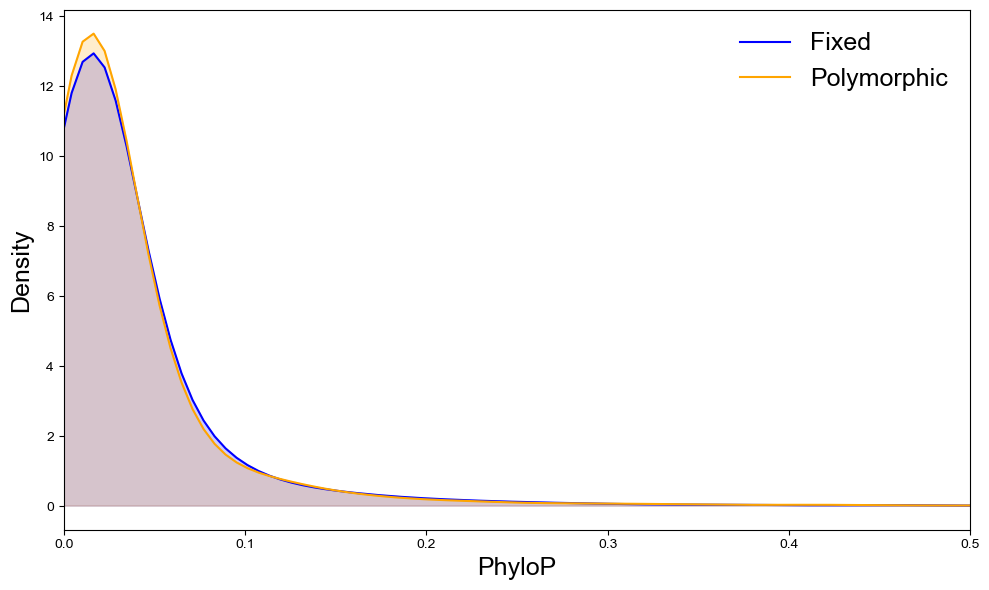

In [174]:
vvv = prepare_alpha(vs[vs[1].isin(c2.sort_values(3).tail(25)[0])], vvs[vvs[1].isin(c2.sort_values(3).tail(25)[0])], stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.05, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.05128506113765574, 0.05, [[3506, 16857], [1295, 6563]], [[3506, 16857], [1295, 6563]], <Figure size 1000x600 with 1 Axes>)
0.07183548140023485


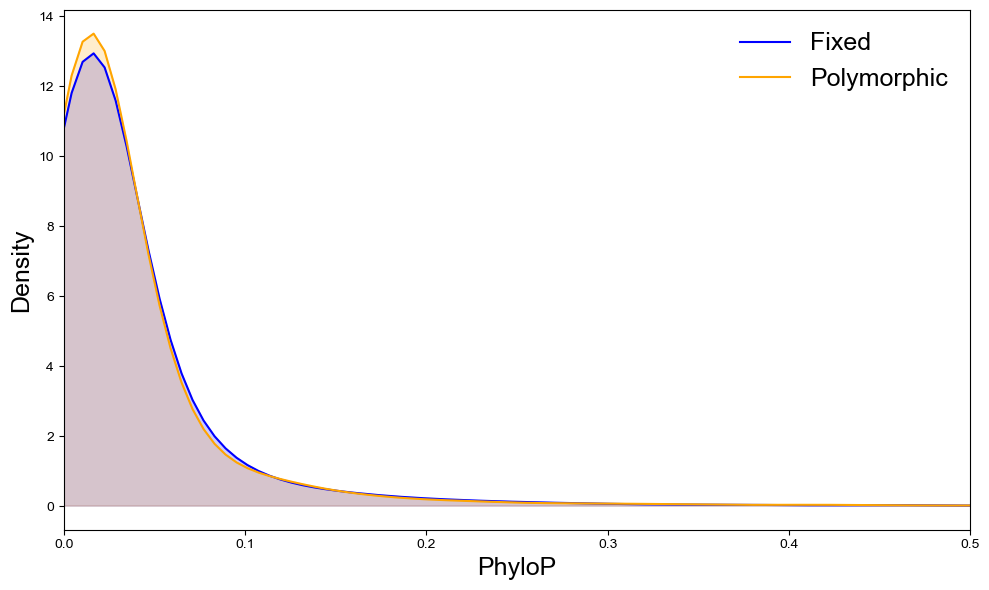

In [156]:
vvv = prepare_alpha(vs[vs[1].isin(c2.sort_values(3).tail(25)[0])], vvs[vvs[1].isin(c2.sort_values(3).tail(25)[0])], stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.05, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

(0.020781285926964044, 0.1, [[15978, 86762], [5129, 28442]], [[15978, 86762], [5129, 28442]], <Figure size 1000x600 with 1 Axes>)
0.11589957232163657


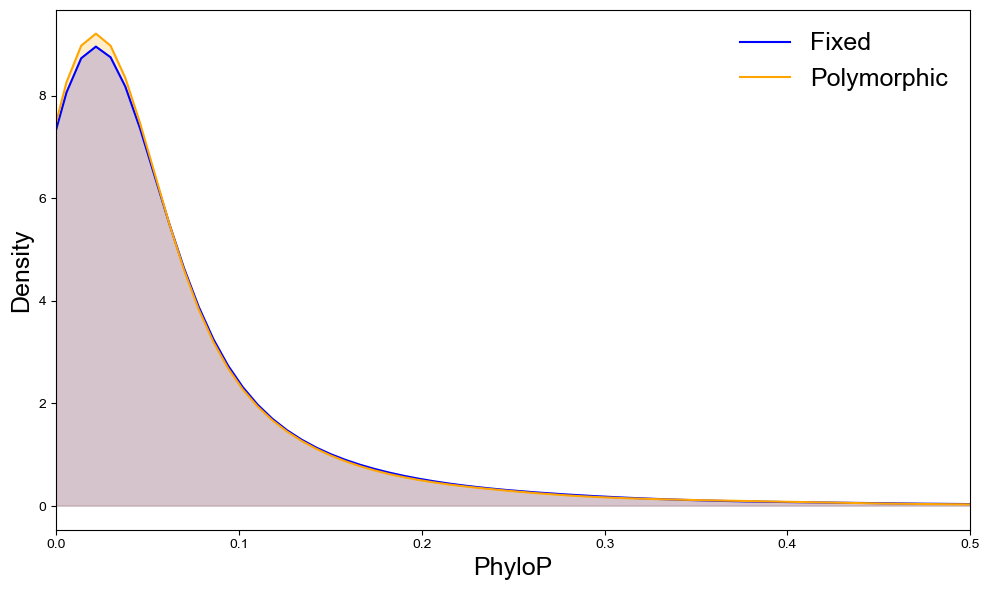

In [101]:
vvv = prepare_alpha(vs_bal, vvs_bal, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.1, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

(0.09757919904363421, 0.1, [[336, 1098], [66, 239]], [[336, 1098], [66, 239]], <Figure size 1000x600 with 1 Axes>)
0.2764312747051429


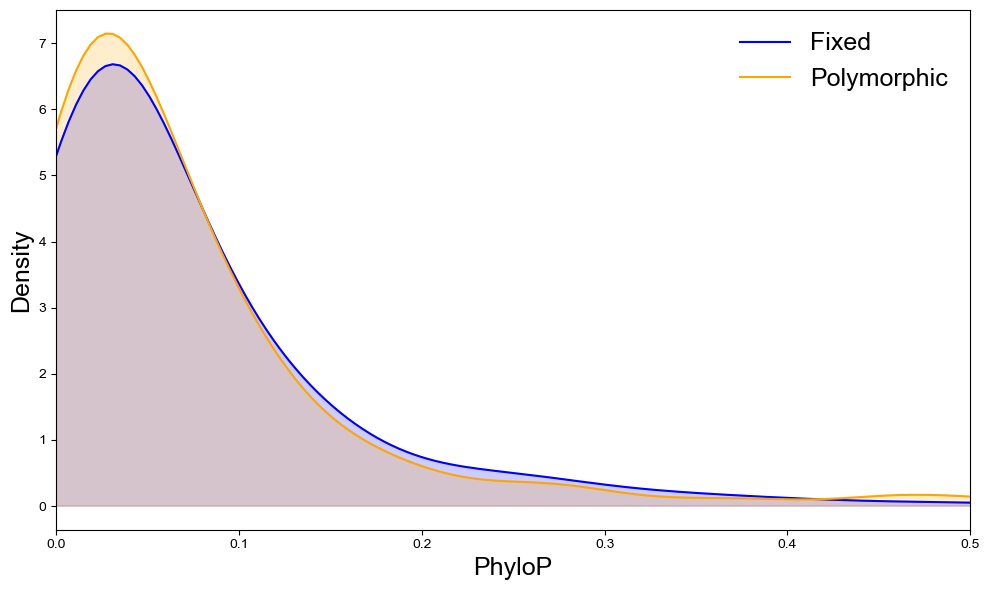

In [86]:
vvv = prepare_alpha(vsro[vsro[1].isin(c2.sort_values(3).head(10)[0])], vvsro[vvsro[1].isin(c2.sort_values(3).head(10)[0])], stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.1, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

(0.02153116681781464, 0.08, [[15474, 60041], [4986, 19772]], [[15474, 60041], [4986, 19772]], <Figure size 1000x600 with 1 Axes>)
0.11798271848069385


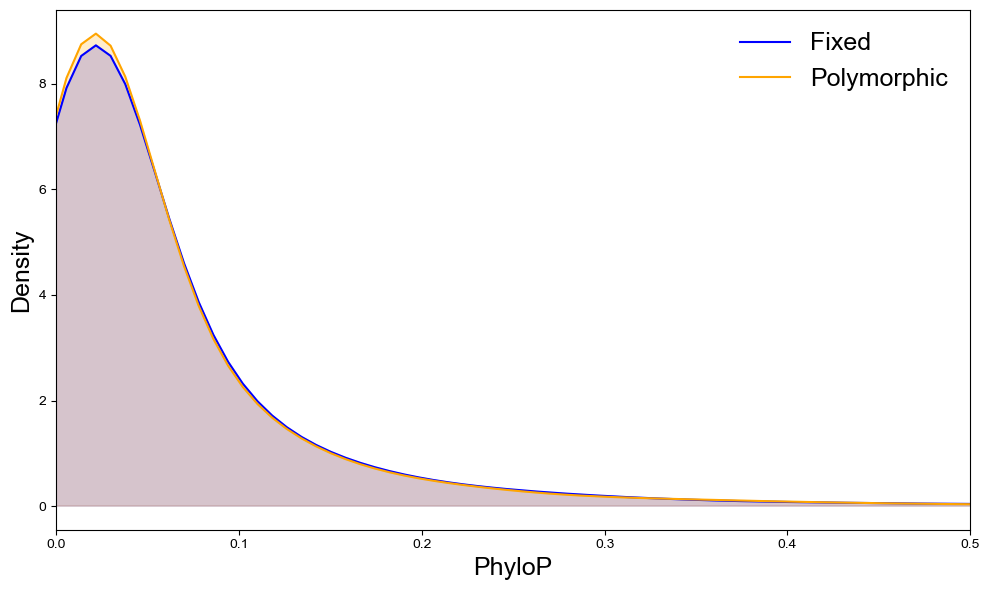

In [74]:
vvv = prepare_alpha(new_vsro, new_vvsro, stat = "abs logfc")
alpha = compute_alpha_cutoff(vvv, plot = True, cutoff = 0.08, window = [0, 0.5])
print(alpha)
print((fisher_exact(alpha[-2], alternative = "greater")[1] + fisher_exact(alpha[-3], alternative = "greater")[1])/2)

In [93]:
#Change 0.1 to 0.25 for NFIB and other TFs with large effects on CA
v2_fore = vsro[vsro["abs logfc"] > 0.25]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("AllSpecSup19-104_AbsG0.25_Fixed_DAergic_FilterNewTEs_Top20th.bed", sep = "\t", header = None, index = None)

vsro["Chrom"] = [x.split(":")[0] for x in vsro["Position"]]
vsro["Pos1"] = [int(x.split(":")[1]) for x in vsro["Position"]]
vsro["Pos2"] = [int(x.split(":")[1]) + 1 for x in vsro["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, vsro[vsro["abs logfc"] < 0.1]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("AllSpecSup19-104_AbsL0.1_G0.25_Fixed_Background_New_DAergic_FilterNewTEs_Top20th.bed", sep = "\t", header = None, index = None)


C:\Users\astar\AppData\Local\Temp\ipykernel_26164\1832673002.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_26164\1832673002.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_26164\1832673002.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [74]:
vtes = Counter(vs[1])
vvtes = Counter(vvs[1])

tes = []
for key in np.intersect1d(list(vtes.keys()), list(vvtes.keys())):
    if vtes[key] >= 100 or vvtes[key] >= 100:
        tes.append([key, vtes[key], vvtes[key], vtes[key]/vvtes[key]])
tes = pd.DataFrame(tes)
tes.sort_values(1).tail(50)

,0,1,2,3
27,L1MA3,124,32,3.875000
26,L1M5,125,32,3.906250
57,Tigger1,125,34,3.676471
34,L1PREC2,127,26,4.884615
54,MER9a1,132,55,2.400000
35,L2,132,50,2.640000
12,AluSz6,144,47,3.063830
29,L1PA13,154,60,2.566667
23,HUERS-P3-int,160,53,3.018868
42,LTR13A,167,79,2.113924


In [75]:
metric = "abs logfc"

out = []

for i in tes[0]:
    if vtes[i] > 100 or vvtes[i] > 100:
        v2k = vs[vs[1].isin([i])]
        vv2k = vvs[vvs[1].isin([i])]
        vvv = prepare_alpha(v2k.copy(), vv2k.copy(), stat = metric)
        x2 = [np.float64(x) for x in list(v2k[metric])]
        yvals2 = [np.float64(j) for j in list(vv2k[metric])]
        yvals2.sort()
        cuttt = 0.9
        cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
        alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = False, cutoff = cutoff, window = [0, 0.5])
        out.append([i] + list(alpha) + [fisher_exact(alpha[-1], alternative = "greater")[0], fisher_exact(alpha[-1], alternative = "greater")[1]])

df_new = pd.DataFrame(out)
df_new = df_new.set_index(0)
df_new.columns = ["alpha", "Cutoff", "Table1", "Table2", "Fisher exact odds ratio", "Fisher exact p-value"]
df_new = df_new.join(tes.set_index(0))
df_new.sort_values("Fisher exact p-value").tail(50)

,alpha,Cutoff,Table1,Table2,Fisher exact odds ratio,Fisher exact p-value,1,2,3
0,,,,,,,,,
LTR12C,0.162209,0.212270,"[[146, 1096], [50, 453]]","[[146, 1096], [51, 452]]",1.180621,0.189243,1242,503,2.469185
HERV17-int,0.297180,0.136843,"[[38, 251], [12, 118]]","[[38, 251], [13, 117]]",1.362550,0.228722,289,130,2.223077
HERVIP10FH-int,0.516774,0.100578,"[[20, 84], [3, 31]]","[[20, 84], [4, 30]]",1.785714,0.235407,104,34,3.058824
AluSc8,0.305352,0.077199,"[[29, 177], [9, 84]]","[[29, 177], [10, 83]]",1.359887,0.276663,206,93,2.215054
L1PA7,0.347525,0.201371,"[[36, 224], [5, 53]]","[[36, 224], [6, 52]]",1.392857,0.318960,260,58,4.482759
HERV9NC-int,0.289011,0.174447,"[[26, 175], [8, 81]]","[[26, 175], [9, 80]]",1.320635,0.319417,201,89,2.258427
L1M5,0.423421,0.073559,"[[22, 103], [3, 29]]","[[22, 103], [4, 28]]",1.495146,0.346679,125,32,3.906250
LTR12D,0.221001,0.164669,"[[43, 319], [9, 91]]","[[43, 319], [10, 90]]",1.213166,0.374220,362,100,3.620000
L1PREC2,0.460490,0.128988,"[[21, 106], [2, 24]]","[[21, 106], [3, 23]]",1.518868,0.382466,127,26,4.884615


In [142]:
df_new.sort_values(3).tail(100).head(50)

,alpha,Cutoff,Table1,Table2,Fisher exact odds ratio,Fisher exact p-value,1,2,3
0,,,,,,,,,
L1MEg,0.184925,0.113000,"[[242, 1785], [60, 548]]","[[242, 1785], [61, 547]]",1.215723,0.110288,2027,608,3.333882
Harlequin-int,-0.199468,0.182886,"[[75, 813], [26, 240]]","[[75, 813], [27, 239]]",0.816591,0.837265,888,266,3.338346
L2c,0.048783,0.138709,"[[236, 2037], [67, 613]]","[[236, 2037], [68, 612]]",1.042710,0.418259,2273,680,3.342647
THE1D-int,-0.180885,0.106674,"[[243, 2569], [84, 757]]","[[243, 2569], [85, 756]]",0.841289,0.913848,2812,841,3.343639
AluJr,0.035386,0.091349,"[[1210, 10518], [349, 3150]]","[[1210, 10518], [350, 3149]]",1.035039,0.307499,11728,3499,3.351815
L1MA5,0.120214,0.121907,"[[179, 1414], [47, 427]]","[[179, 1414], [48, 426]]",1.123497,0.278566,1593,474,3.360759
.,0.008677,0.126948,"[[11035, 98470], [3255, 29305]]","[[11035, 98470], [3256, 29304]]",1.008581,0.346552,109505,32560,3.363176
MER41B,-0.300074,0.198464,"[[57, 660], [21, 192]]","[[57, 660], [22, 191]]",0.749793,0.889602,717,213,3.366197
L1MA7,0.191962,0.128159,"[[234, 1705], [57, 519]]","[[234, 1705], [58, 518]]",1.225726,0.106236,1939,576,3.366319


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

SignificanceResult(statistic=1.1266855004620433, pvalue=9.624535110806713e-12)
(0.11254571729260893, 0.064236544, [[15062, 120293], [4702, 42320]], [[15062, 120293], [4703, 42319]], <Figure size 1000x600 with 1 Axes>)


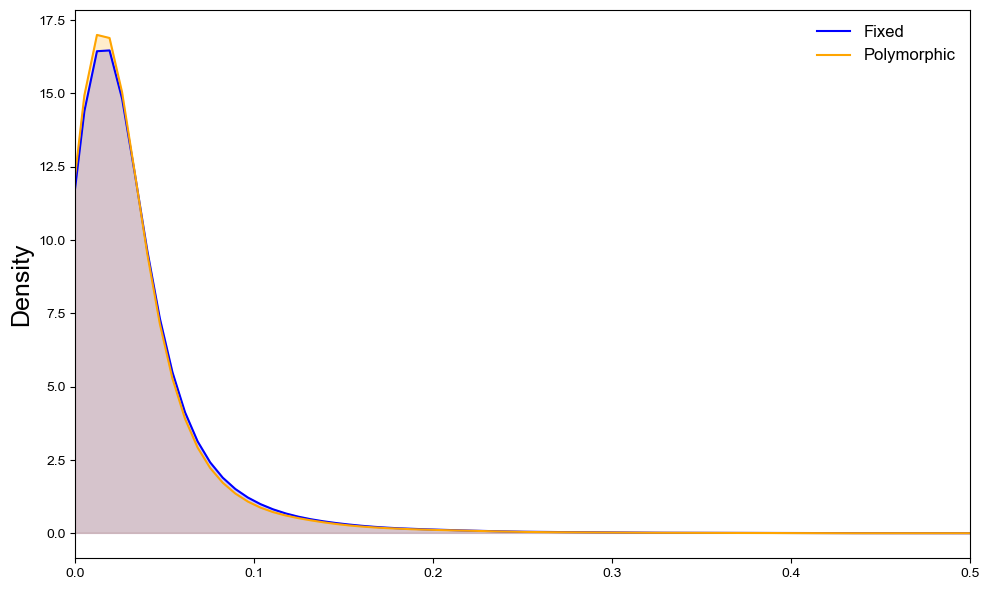

In [135]:
metric = "abs logfc"

v2k = vs[vs[1].isin(["AluSp", "AluSx", "AluSx3", "AluSc", "AluSg"])]
vv2k = vvs[vvs[1].isin(["AluSp", "AluSx", "AluSx3", "AluSc", "AluSg"])]

x2 = [np.float64(x) for x in list(v2k[metric])]
yvals2 = [np.float64(j) for j in list(vv2k[metric])]

yvals2.sort()
vvv = prepare_alpha(v2k, vv2k, stat = metric)
cuttt = 0.9
cutoff = yvals2[int(floor((len(yvals2)*cuttt)))]
alpha = compute_alpha_cutoff(vvv, dn_cut = 0.05, plot = True, cutoff = cutoff, window = [0, 0.5])
print(fisher_exact(alpha[-2]))
print(alpha)

In [124]:
v2k[v2k["NearestGene"].isin(["ARNT2"])].sort_values("logfc")

,Position,Position.1,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,logfc,allele1_pred_counts,allele2_pred_counts,abs logfc,FixedOrPoly,MAFMaxAcrossAncestry,UnfoldedMAF,1
Position,,,,,,,,,,,,,,,


In [137]:
#Change 0.1 to 0.25 for NFIB and other TFs with large effects on CA
v2_fore = v2k[v2k["abs logfc"] > 0.1]

v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
v2_fore["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2_fore["Position"]]
v2_fore = v2_fore[["Chrom", "Pos1", "Pos2"]]

#Need to change 
v2_fore.to_csv("Alu_19-104_AbsG0.1_Fixed_FetalChondrocytes_FilterNewTEs_All.bed", sep = "\t", header = None, index = None)

v2k["Chrom"] = [x.split(":")[0] for x in v2k["Position"]]
v2k["Pos1"] = [int(x.split(":")[1]) for x in v2k["Position"]]
v2k["Pos2"] = [int(x.split(":")[1]) + 1 for x in v2k["Position"]]

#Set to 0.05 for MEF2A
#Change 0.025 to 0.1 for NFIB and other TFs with large effects on CA
v2_back = pd.concat([v2_fore, v2k[v2k["abs logfc"] < 0.025]])
v2_back = v2_back[["Chrom", "Pos1", "Pos2"]]
v2_back.to_csv("Alu_19-104_AbsL0.025_G0.1_Fixed_Background_New_FetalChondrocytes_FilterNewTEs_All.bed", sep = "\t", header = None, index = None)


C:\Users\astar\AppData\Local\Temp\ipykernel_9200\516238585.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Chrom"] = [x.split(":")[0] for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_9200\516238585.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2_fore["Pos1"] = [int(x.split(":")[1]) for x in v2_fore["Position"]]
C:\Users\astar\AppData\Local\Temp\ipykernel_9200\516238585.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poly["FixedOrPoly"] = y
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed["FixedOrPoly"] = x
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

SignificanceResult(statistic=1.2332862930398865, pvalue=3.949150871383199e-11)
(0.18947864495093975, 0.054290593, [[4674, 34090], [1405, 12648]], [[4674, 34090], [1406, 12647]], <Figure size 1000x600 with 1 Axes>)


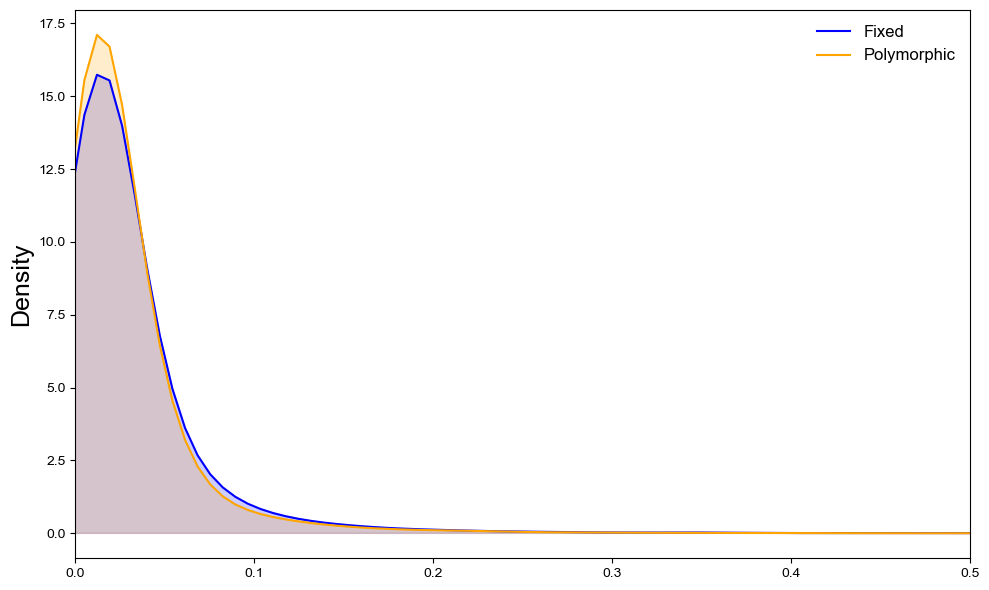

In [31]:
vvtes

Counter({'MSTA': 371,
         'LTR8': 265,
         'MIRb': 327,
         'AluSx': 4390,
         'L1MB7': 147,
         'AluSx4': 1020,
         'AluSx3': 2935,
         'AluSg': 4132,
         '.': 15784,
         'AluSc': 2711,
         'AluSp': 4164,
         'MLT1D': 141,
         'AluSx1': 2778,
         'AluJo': 296,
         'AluSq2': 1905,
         'AluSz': 426,
         'L2a': 746,
         'HERVP71A-int': 63,
         'Alu': 39,
         'L1MC4': 115,
         'AluSz6': 863,
         'L3': 55,
         'AluJb': 1998,
         'MER11B': 102,
         'HERV9N-int': 82,
         'AluJr4': 68,
         'L1ME3A': 77,
         'L1MB5': 82,
         'L1ME4b': 85,
         'L1ME1': 143,
         'Charlie15a': 10,
         'AluSg7': 463,
         'MER52D': 243,
         'THE1B': 300,
         '5S': 9,
         'L1PA7': 1188,
         'AluSq10': 261,
         'MIR': 273,
         'L1PREC2': 291,
         'LTR14B': 144,
         'THE1D-int': 346,
         'LTR10B1': 44,
         'MER3

In [45]:
z = pd.read_csv("HumChp_NC_ClosestPoly.bed.gz", sep = "\t", header = None)
z["Fixed Position"] = z[0] + ":" + z[1].astype(str)
z["Poly Position"] = z[2] + ":" + z[3].astype(str)

z = z[z[4] < 5000]
z = z.drop_duplicates("Fixed Position")
z = z.drop_duplicates("Poly Position")
z = z[["Fixed Position", "Poly Position", 4]]
z.columns = ["Fixed Position", "Poly Position", "DistToPoly"]
z.index = z["Fixed Position"]

from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
vs.index = vs["Position"]
vs2 = vs.join(z).dropna()
vs2.index = vs2["Poly Position"]
vvs.index = vvs["Position"]
vvss = vvs.copy()
vvss.columns = [x + " Poly" for x in vvss.columns]
vs2 = vs2.join(vvss).dropna()

ttest_rel(vs2["allele1_pred_counts"], vs2["allele1_pred_counts Poly"])

,0,1,2,3
28,HERVK22-int,779,215,3.623256
65,MSTB,782,238,3.285714
41,L1PA15,794,222,3.576577
27,HERVIP10F-int,811,276,2.938406
67,THE1B,814,300,2.713333
66,THE1A-int,819,252,3.250000
47,L1PBa,834,250,3.336000
59,MER52D,847,243,3.485597
56,LTR8,856,265,3.230189
61,MIR,893,273,3.271062


In [68]:
df_new = pd.DataFrame(out)
df_new = df_new.set_index(0)
df_new.columns = ["alpha", "Cutoff", "Table1", "Table2", "Fisher exact odds ratio", "Fisher exact p-value"]
df_new = df_new.join(tes.set_index(0))
df_new.sort_values("Fisher exact p-value").head(50)

,alpha,Cutoff,Table1,Table2,Fisher exact odds ratio,Fisher exact p-value,1,2,3
0,,,,,,,,,
AluSp,0.214301,0.052248,"[[1340, 9473], [416, 3748]]","[[1340, 9473], [417, 3747]]",1.271057,0.000044,10813,4164,2.596782
AluSx,0.166280,0.056621,"[[1425, 10706], [438, 3952]]","[[1425, 10706], [439, 3951]]",1.197926,0.001653,12131,4390,2.763326
AluSz6,0.325143,0.059008,"[[396, 2399], [86, 777]]","[[396, 2399], [87, 776]]",1.472338,0.001861,2795,863,3.238702
AluSq,0.392814,0.040985,"[[232, 1265], [50, 454]]","[[232, 1265], [51, 453]]",1.629017,0.002411,1497,504,2.970238
L1PA15-16,-1.181559,0.177185,"[[31, 597], [17, 155]]","[[31, 597], [18, 154]]",0.444258,0.011292,628,172,3.651163
AluSg,0.135613,0.054413,"[[1314, 10214], [413, 3719]]","[[1314, 10214], [414, 3718]]",1.155337,0.015071,11528,4132,2.789932
THE1C,-1.113773,0.283728,"[[24, 480], [14, 143]]","[[24, 480], [16, 141]]",0.440625,0.019930,504,157,3.210191
L1PBa,-0.819358,0.197049,"[[47, 787], [24, 226]]","[[47, 787], [25, 225]]",0.537484,0.019981,834,250,3.336000
L1PA13,-0.475756,0.130861,"[[71, 933], [31, 281]]","[[71, 933], [32, 280]]",0.665863,0.070976,1004,312,3.217949


(-0.02549552494074181,
 0.1,
 [[14987, 88515], [4740, 27299]],
 [[14987, 88515], [4740, 27299]],
 <Figure size 1000x600 with 1 Axes>)

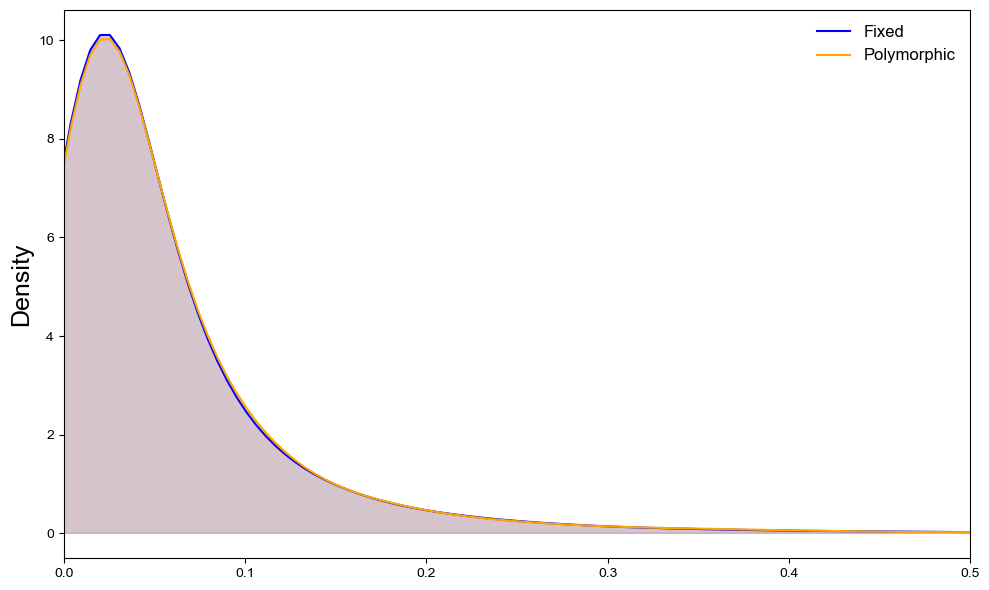

In [6]:
vvv = prepare_alpha(vsr, vvsr, stat = "abs logfc")
compute_alpha_cutoff(vvv, plot = True, cutoff = 0.1, window = [0, 0.5])

C:\Users\astar\AppData\Local\Temp\ipykernel_27012\4026773861.py:1: DtypeWarning: Columns (2,17) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_FilterNewTEs_VIP.txt.gz", sep = "\t")


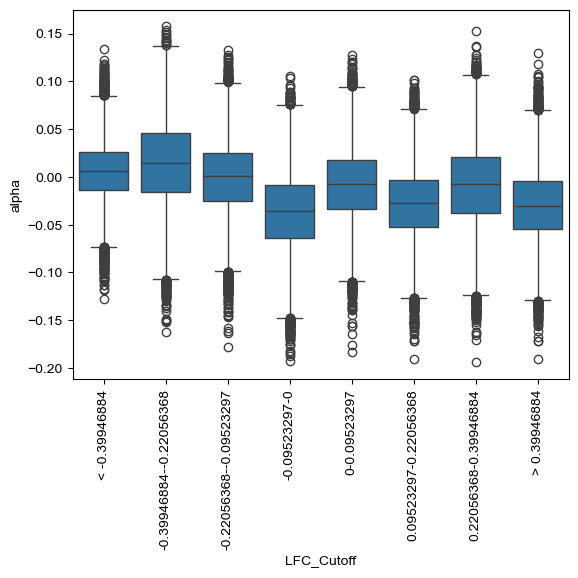

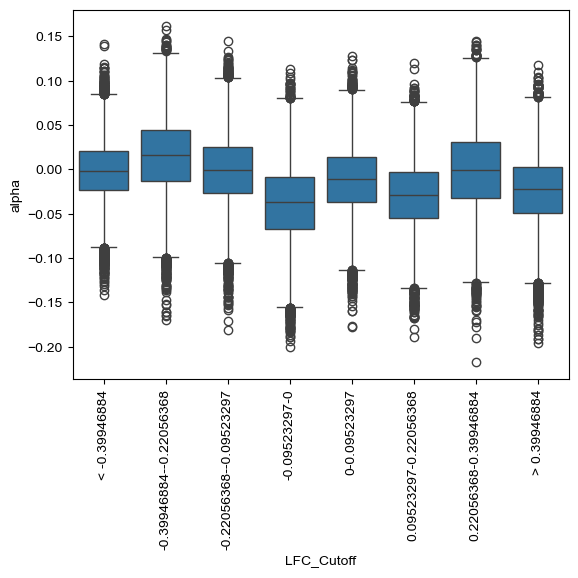

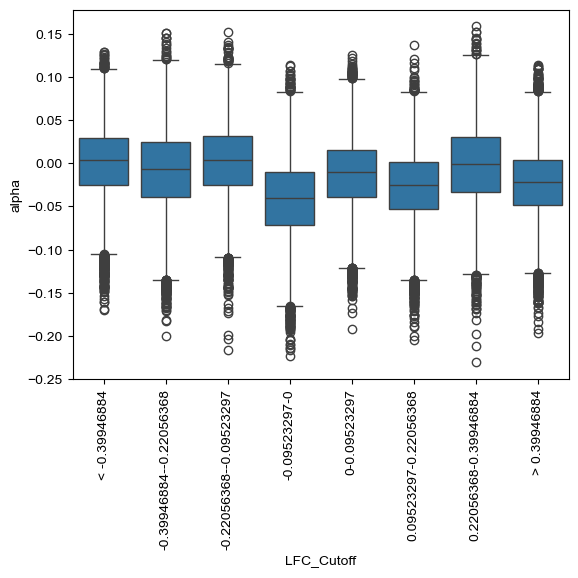

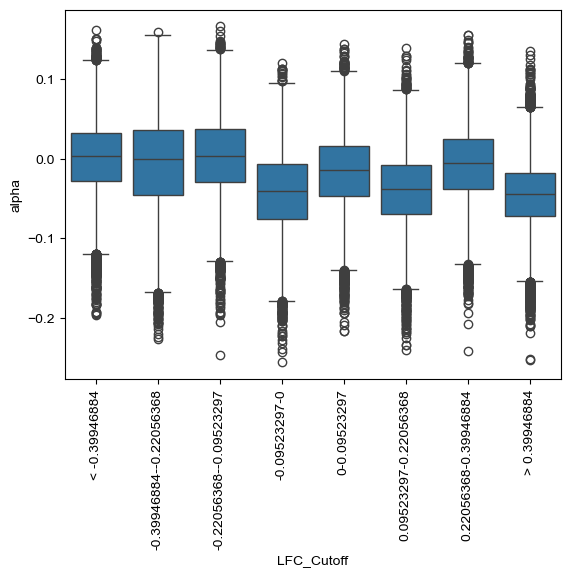

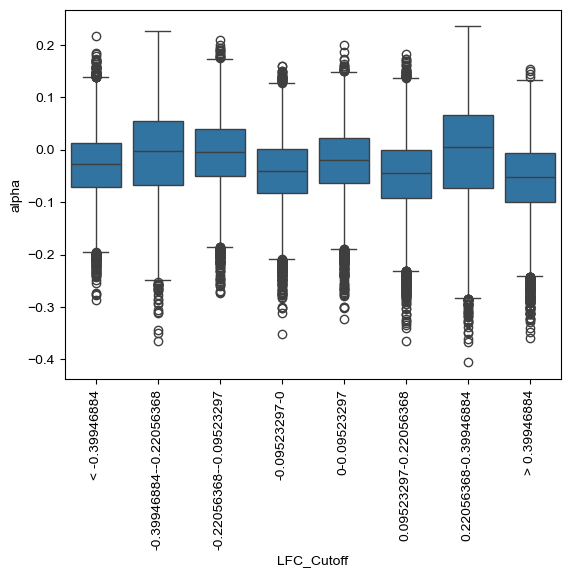

In [14]:
v = pd.read_csv("StratifyLFC_Results/StratifiedByLogfc_FilterNewTEs_VIP.txt.gz", sep = "\t")

for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9]:
    v2 = v[v["Proportion"] == cutoff]
    v2 = v2[v2["Top_20th"] == "All"]
    sns.boxplot(data = v2, y = "alpha", x = "LFC_Cutoff")
    plt.xticks(rotation = 90)
    plt.show()
    

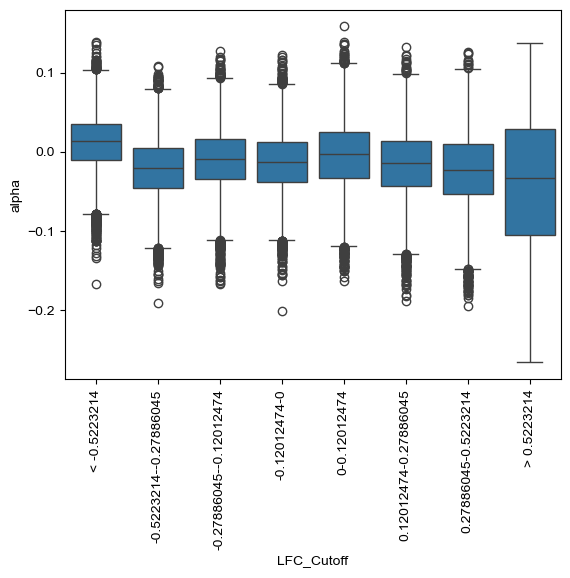

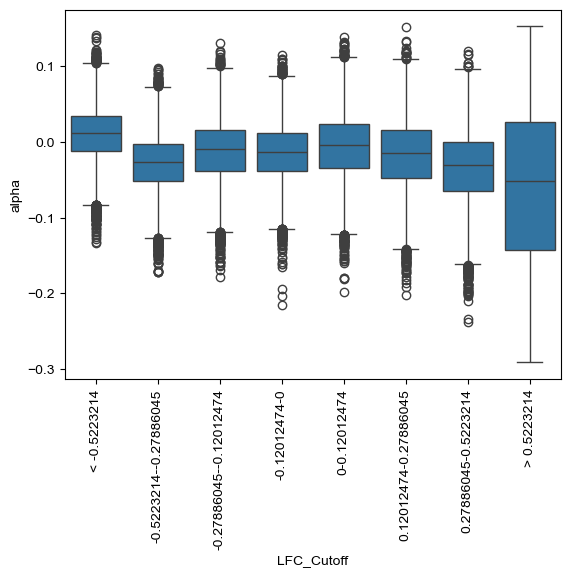

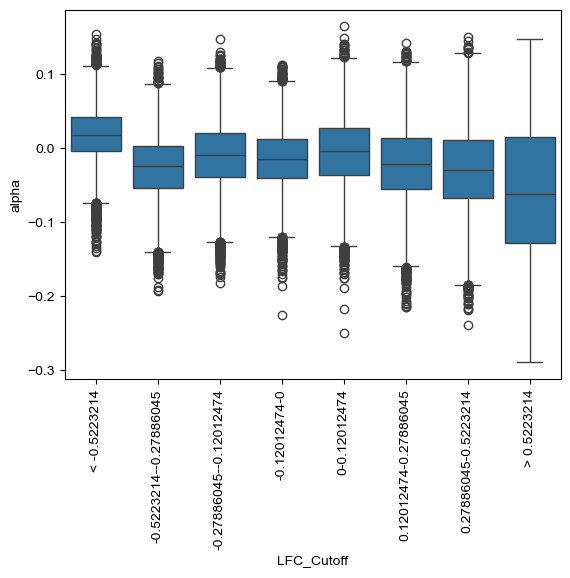

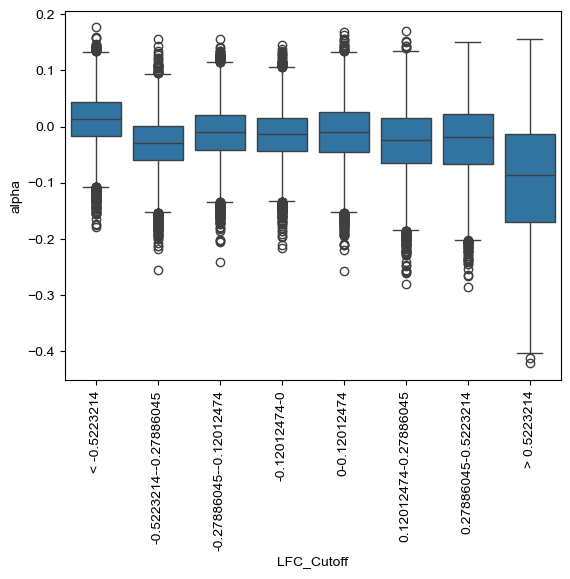

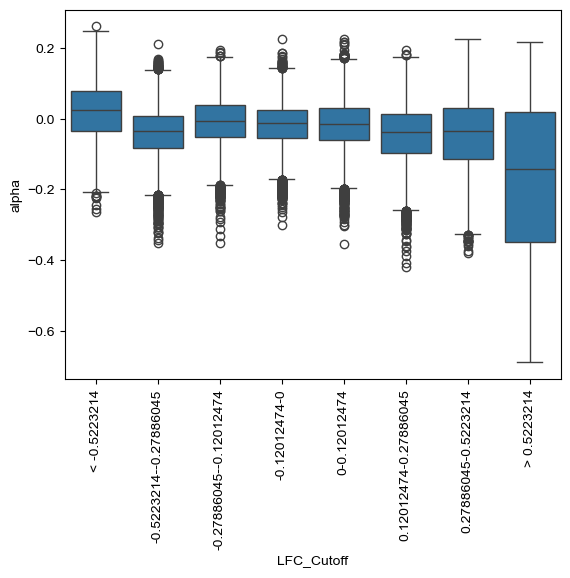

In [4]:
for cutoff in [0.5, 0.6, 0.7, 0.8, 0.9]:
    v2 = v[v["Proportion"] == cutoff]
    v2 = v2[v2["Top_20th"] == "All"]
    sns.boxplot(data = v2, y = "alpha", x = "LFC_Cutoff")
    plt.xticks(rotation = 90)
    plt.show()
   